# Segmenter, DeepLabv3+, and DANet Model for Bone Scan Image Semantic Segmentation

By: Alfinata Yusuf Sitaba (1301190364)

# Preprocessing

## Mount Drive (For Downloading Purposes)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


## Deleting certain folder

In [ ]:
# !rm -rf /content/mmsegmentation/outputs

## Install Necessary Libraries

In [ ]:
# !pip install -e .

In [ ]:
# Check nvcc version
!nvcc -V

# Check GCC version
!gcc --version

# Install PyTorch
!conda install pytorch==1.12.0 torchvision==0.13.0 torchaudio==0.12.0 cudatoolkit=11.3 -c pytorch

# Install mim
!pip install -U openmim

# Install mmengine
!mim install mmengine

# Install MMCV
!mim install 'mmcv >= 2.0.0rc1'

!rm -rf mmsegmentation
!git clone https://github.com/open-mmlab/mmsegmentation.git
%cd mmsegmentation
!pip install -e .

# Weirdly necessary to run gdown
!pip install --upgrade --no-cache-dir gdown

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 4.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.3/374.3 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 25.1 MB

In [ ]:
import locale

# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

# from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
# from mmseg.core.evaluation import get_palette

import mmcv
import mmengine
import matplotlib.pyplot as plt

import os.path as osp
import numpy as np
from PIL import Image

import matplotlib.patches as mpatches

from mmseg.registry import DATASETS
from mmseg.datasets import BaseSegDataset

from mmengine import Config

from mmengine.runner import Runner

from mmseg.apis import init_model, inference_model, show_result_pyplot, MMSegInferencer

# from mmseg.apis import set_random_seed
# from mmseg.utils import get_device

# from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
# from mmseg.apis import train_segmentor
# from mmseg.apis import single_gpu_test

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"

!mkdir checkpoints

2.0.1+cu118 True
1.0.0


## Refresh Code

In [ ]:
locale.getpreferredencoding = getpreferredencoding

torch.cuda.empty_cache()

## Download pre-trained weights

In [ ]:
# Load segmenter checkpoints

# # Tiny variant
# !wget https://download.openmmlab.com/mmsegmentation/v0.5/segmenter/segmenter_vit-t_mask_8x1_512x512_160k_ade20k/segmenter_vit-t_mask_8x1_512x512_160k_ade20k_20220105_151706-ffcf7509.pth -P checkpoints

# # Small variant
# !wget https://download.openmmlab.com/mmsegmentation/v0.5/segmenter/segmenter_vit-s_mask_8x1_512x512_160k_ade20k/segmenter_vit-s_mask_8x1_512x512_160k_ade20k_20220105_151706-511bb103.pth -P checkpoints

# # Big variant
# !wget https://download.openmmlab.com/mmsegmentation/v0.5/segmenter/segmenter_vit-b_mask_8x1_512x512_160k_ade20k/segmenter_vit-b_mask_8x1_512x512_160k_ade20k_20220105_151706-bc533b08.pth -P checkpoints

# # Large variant
# !wget https://download.openmmlab.com/mmsegmentation/v0.5/segmenter/segmenter_vit-l_mask_8x1_640x640_160k_ade20k/segmenter_vit-l_mask_8x1_640x640_160k_ade20k_20220614_024513-4783a347.pth -P checkpoints

# Load deeplab checkpoints

# # 50
# !wget https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3plus/deeplabv3plus_r50-d8_512x512_160k_ade20k/deeplabv3plus_r50-d8_512x512_160k_ade20k_20200615_124504-6135c7e0.pth -P checkpoints

# # 100
# !wget https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3plus/deeplabv3plus_r101-d8_512x512_160k_ade20k/deeplabv3plus_r101-d8_512x512_160k_ade20k_20200615_123232-38ed86bb.pth -P checkpoints

# # # DANet

# 50
!wget https://download.openmmlab.com/mmsegmentation/v0.5/danet/danet_r50-d8_512x512_160k_ade20k/danet_r50-d8_512x512_160k_ade20k_20200616_082340-9cb35dcd.pth -P checkpoints

# # 100
# !wget https://download.openmmlab.com/mmsegmentation/v0.5/danet/danet_r101-d8_512x512_160k_ade20k/danet_r101-d8_512x512_160k_ade20k_20200616_082348-23bf12f9.pth -P checkpoints

# # DEST
# !wget https://download.openmmlab.com/mmsegmentation/v0.5/dest/dest_simpatt-b0_1024x1024_160k_cityscapes_20230105_232025-11f73f34.pth -P checkpoints

--2023-06-04 12:59:16--  https://download.openmmlab.com/mmsegmentation/v0.5/danet/danet_r50-d8_512x512_160k_ade20k/danet_r50-d8_512x512_160k_ade20k_20200616_082340-9cb35dcd.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.48.85.209, 8.48.85.207, 8.48.85.213, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.48.85.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200637721 (191M) [application/octet-stream]
Saving to: ‘checkpoints/danet_r50-d8_512x512_160k_ade20k_20200616_082340-9cb35dcd.pth’

danet_r50-d8_512x51 100%[===================>] 191.34M  9.41MB/s    in 21s     

2023-06-04 12:59:37 (9.14 MB/s) - ‘checkpoints/danet_r50-d8_512x512_160k_ade20k_20200616_082340-9cb35dcd.pth’ saved [200637721/200637721]



## Run Inference

/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: checkpoints/segmenter_vit-t_mask_8x1_512x512_160k_ade20k_20220105_151706-ffcf7509.pth
05/03 05:27:48 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


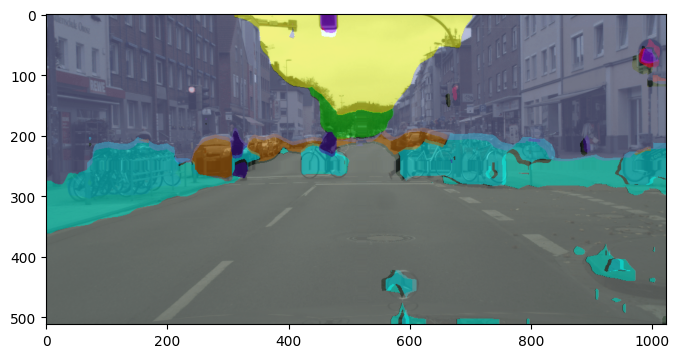

In [ ]:
# Init the model from the config and the checkpoint
cfg = Config.fromfile('configs/segmenter/segmenter_vit-t_mask_8xb1-160k_ade20k-512x512.py')
checkpoint_path = 'checkpoints/segmenter_vit-t_mask_8x1_512x512_160k_ade20k_20220105_151706-ffcf7509.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')

img = mmcv.imread('demo/demo.png')
result = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, img, result)
plt.imshow(mmcv.bgr2rgb(vis_result))

# img = mmcv.imread('AnteriorDataset/images/0.png')
# plt.figure(figsize=(8, 6))
# plt.imshow(mmcv.bgr2rgb(img))
# plt.show()

## Load Dataset

In [ ]:
# Download and unzip the dataset

!gdown https://drive.google.com/uc?id=1VQr_LB0XAyAGDv0wg04_fOSAIe3J5HOi
!gdown https://drive.google.com/uc?id=1OyUgYk37Yw_ts3_tdIrLd8yaMBz7b5RP

!unzip AnteriorDatasetFull.zip
!unzip PosteriorDatasetFull.zip

Downloading...
From: https://drive.google.com/uc?id=1VQr_LB0XAyAGDv0wg04_fOSAIe3J5HOi
To: /content/mmsegmentation/AnteriorDatasetFull.zip
100% 1.69M/1.69M [00:00<00:00, 202MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OyUgYk37Yw_ts3_tdIrLd8yaMBz7b5RP
To: /content/mmsegmentation/PosteriorDatasetFull.zip
100% 1.75M/1.75M [00:00<00:00, 208MB/s]
Archive:  AnteriorDatasetFull.zip
   creating: AnteriorDatasetFull/
   creating: AnteriorDatasetFull/images/
  inflating: AnteriorDatasetFull/images/0.png  
  inflating: AnteriorDatasetFull/images/10.png  
  inflating: AnteriorDatasetFull/images/12.png  
  inflating: AnteriorDatasetFull/images/14.png  
  inflating: AnteriorDatasetFull/images/16.png  
  inflating: AnteriorDatasetFull/images/18.png  
  inflating: AnteriorDatasetFull/images/2.png  
  inflating: AnteriorDatasetFull/images/20.png  
  inflating: AnteriorDatasetFull/images/22.png  
  inflating: AnteriorDatasetFull/images/24.png  
  inflating: AnteriorDatasetFull/images/26.png

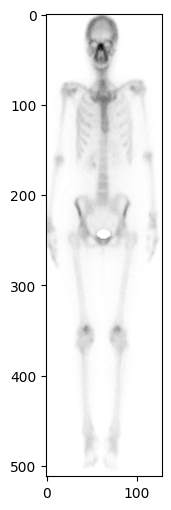

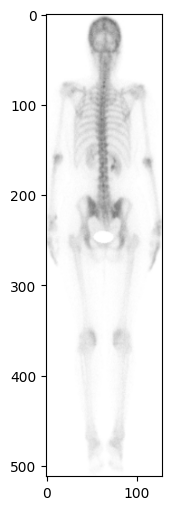

In [ ]:
# Let's take a look at the dataset

img = mmcv.imread('AnteriorDatasetFull/images/0.png')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

img = mmcv.imread('PosteriorDatasetFull/images/1.png')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [ ]:
# convert dataset annotation to semantic segmentation map
img_dir = 'images'
ann_dir = 'labels'

# # define class and plaette for better visualization
# classes = ('tengkorak',
#            'vertebra serviks',
#            'vertebra toraks',
#            'tulang rusuk',
#            'tulang dada',
#            'tulang selangka',
#            'tulang belikat',
#            'humerus',
#            'vertebra lumbalis',
#            'tulang kelangkang',
#            'panggul',
#            'tulang paha')

# define class and plaette for better visualization
classes = ('skull',
           'cervical vertebrae',
           'thoracic vertebrae',
           'rib',
           'sternum',
           'collarbone',
           'scapula',
           'humerus',
           'lumbar vertebrae',
           'sacrum',
           'pelvis',
           'femur')

palette = [[176, 230, 13],
           [0, 151, 219],
           [126, 230, 225],
           [166, 55, 167],
           [230, 157, 180],
           [167, 110, 77],
           [121, 0, 24],
           [56, 65, 184],
           [230, 218, 0],
           [230, 114, 35],
           [13, 187, 62],
           [230, 182, 22]]

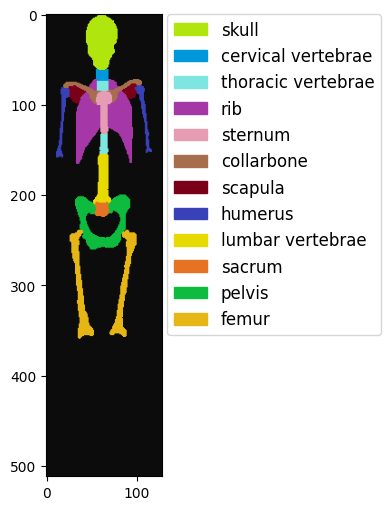

In [ ]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches
img = Image.open('AnteriorDatasetFull/labels/0.png')
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color
patches = [mpatches.Patch(color=np.array(palette[i])/255.,
                          label=classes[i]) for i in range(12)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
           fontsize='large')

plt.show()

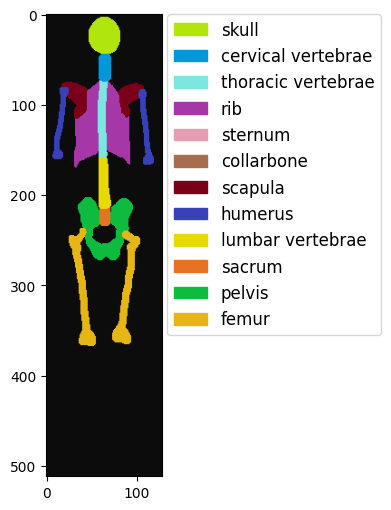

In [ ]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches
img = Image.open('PosteriorDatasetFull/labels/1.png')
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color
patches = [mpatches.Patch(color=np.array(palette[i])/255.,
                          label=classes[i]) for i in range(12)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
           fontsize='large')

plt.show()

In [ ]:
@DATASETS.register_module()
class AnteriorDatasetFull(BaseSegDataset):
  METAINFO = dict(classes = classes, palette = palette)
  def __init__(self, **kwargs):
    super().__init__(img_suffix='.png', seg_map_suffix='.png', **kwargs)

In [ ]:
@DATASETS.register_module()
class PosteriorDatasetFull(BaseSegDataset):
  METAINFO = dict(classes = classes, palette = palette)
  def __init__(self, **kwargs):
    super().__init__(img_suffix='.png', seg_map_suffix='.png', **kwargs)

In [ ]:
# @DATASETS.register_module()
# class AnteriorDataset(BaseSegDataset):
#   METAINFO = dict(classes = classes, palette = palette)
#   def __init__(self, **kwargs):
#     super().__init__(img_suffix='.png', seg_map_suffix='.png', **kwargs)

# Experiment

In [ ]:
MAX_ITERATIONS = 5000
LOG_CONFIG_INTERVAL = 500
EVALUATION_INTERVAL = 500
CHECKPOINT_CONFIG_INTERVAL = 5000
BATCH_SIZE = 3

# # Anterior
# DATASET_TYPE = 'AnteriorDatasetFull'
# DATA_ROOT = 'AnteriorDatasetFull'
# IMAGE_TEST = 'AnteriorDatasetFull/images/0.png'

# Posterior
DATASET_TYPE = 'PosteriorDatasetFull'
DATA_ROOT = 'PosteriorDatasetFull'
IMAGE_TEST = 'PosteriorDatasetFull/images/1.png'

# Segmenter Variant

## Tiny Variant

In [ ]:
cfg = Config.fromfile('configs/segmenter/segmenter_vit-t_mask_8xb1-160k_ade20k-512x512.py')

cfg.dataset_type = DATASET_TYPE
cfg.data_root = DATA_ROOT

cfg.train_dataloader.batch_size = BATCH_SIZE

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomResize', scale=(256, 1024), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(256, 1024), keep_ratio=True),
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]

cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
cfg.train_dataloader.dataset.ann_file = 'splits/train.txt'

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.val_dataloader.dataset.ann_file = 'splits/val.txt'

cfg.test_dataloader = cfg.val_dataloader
cfg.test_dataloader.dataset.ann_file = 'splits/test.txt'

cfg.load_from = 'checkpoints/segmenter_vit-t_mask_8x1_512x512_160k_ade20k_20220105_151706-ffcf7509.pth'

cfg.work_dir = './work_dirs/tutorial'

cfg.train_cfg.max_iters = MAX_ITERATIONS
cfg.train_cfg.val_interval = EVALUATION_INTERVAL
cfg.default_hooks.logger.interval = LOG_CONFIG_INTERVAL
cfg.default_hooks.checkpoint.interval = CHECKPOINT_CONFIG_INTERVAL

cfg['randomness'] = dict(seed=0)

print(f'Config:\n{cfg.pretty_text}')

cfg_seg_t = cfg

Config:
checkpoint = 'https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segmenter/vit_tiny_p16_384_20220308-cce8c795.pth'
backbone_norm_cfg = dict(type='LN', eps=1e-06, requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[127.5, 127.5, 127.5],
    std=[127.5, 127.5, 127.5],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(512, 512))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[127.5, 127.5, 127.5],
        std=[127.5, 127.5, 127.5],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(512, 512)),
    pretrained=
    'https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segmenter/vit_tiny_p16_384_20220308-cce8c795.pth',
    backbone=dict(
        type='VisionTransformer',
        img_size=(512, 512),
        patch_size=16,
        in_channels=3,
        embed_dims=192,
        num_layers=12,
        num_heads=3,
   

In [ ]:
runner_seg_t = Runner.from_cfg(cfg_seg_t)

05/05 06:44:23 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


05/05 06:44:25 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
05/05 06:44:25 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/models/backbones/vit.py:218: UserWarning: DeprecationWarning: pretrained is deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is deprecated, '
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means 

In [ ]:
# start training
runner_seg_t.train()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


05/05 06:44:27 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segmenter/vit_tiny_p16_384_20220308-cce8c795.pth


Downloading: "https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segmenter/vit_tiny_p16_384_20220308-cce8c795.pth" to /root/.cache/torch/hub/checkpoints/vit_tiny_p16_384_20220308-cce8c795.pth


Resize the pos_embed shape from torch.Size([1, 577, 192]) to torch.Size([1, 1025, 192])
Loads checkpoint by local backend from path: checkpoints/segmenter_vit-t_mask_8x1_512x512_160k_ade20k_20220105_151706-ffcf7509.pth
05/05 06:44:32 - mmengine - INFO - Load checkpoint from checkpoints/segmenter_vit-t_mask_8x1_512x512_160k_ade20k_20220105_151706-ffcf7509.pth
05/05 06:44:32 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
05/05 06:44:32 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
05/05 06:44:32 - mmengine - INFO - Checkpoints will be saved to /content/mmsegmentation/work_dirs/tutorial.
05/05 06:44:43 - mmengine - INFO - Exp name: segmenter_vit-t_mask_8xb1-160k_ade20k-512x512_20230505_064423
05/05 06:44:43 - mmengine - INFO - Iter(train) [   8/5000]  lr: 9.9996e-04  eta: 2:01:15  time: 1.4574  data_time: 0.0

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


05/05 06:47:37 - mmengine - INFO - per class results:
05/05 06:47:37 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 80.74 | 92.93 |
|  vertebra serviks | 43.89 |  47.9 |
|  vertebra toraks  | 76.28 | 80.35 |
|    tulang rusuk   | 79.85 | 92.41 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 53.45 | 58.78 |
|      humerus      | 45.73 | 84.96 |
| vertebra lumbalis |  59.7 | 95.73 |
| tulang kelangkang | 37.52 | 49.04 |
|      panggul      | 50.82 | 83.59 |
|    tulang paha    |  7.14 |  7.83 |
+-------------------+-------+-------+
05/05 06:47:37 - mmengine - INFO - Iter(val) [7/7]    aAcc: 70.7600  mIoU: 53.5100  mAcc: 69.3500  data_time: 0.0322  time: 0.0972
05/05 06:50:33 - mmengine - INFO - Exp name: segmenter_vit-t_mask_8xb1-160k_ade20k-512x512_20230505_064423
05/05 06:50:33 - mmengine - INFO - Iter(train) [1000/5000]  lr: 

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): VisionTransformer(
    (patch_embed): PatchEmbed(
      (adap_padding): AdaptivePadding()
      (projection): Conv2d(3, 192, kernel_size=(16, 16), stride=(16, 16))
    )
    (drop_after_pos): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (ln1): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
        (attn): MultiheadAttention(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=192, out_features=192, bias=True)
          )
          (proj_drop): Dropout(p=0.0, inplace=False)
          (dropout_layer): Dropout(p=0.0, inplace=False)
        )
        (ln2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
        (ffn): FFN(
          (layers): Sequential(
            (0): Sequential(
              (0): Linear(in_features=192, out_features=768, bias=True)
              (1): GELU(approximate='none'

In [ ]:
# start validating
runner_seg_t.val()

05/05 07:14:00 - mmengine - INFO - per class results:
05/05 07:14:00 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 90.37 | 92.84 |
|  vertebra serviks | 59.96 | 70.16 |
|  vertebra toraks  | 74.82 | 80.43 |
|    tulang rusuk   | 83.09 | 93.78 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 70.63 |  78.3 |
|      humerus      | 59.84 | 79.21 |
| vertebra lumbalis | 76.37 | 92.93 |
| tulang kelangkang | 62.65 | 87.62 |
|      panggul      | 70.86 | 87.12 |
|    tulang paha    | 38.66 | 48.38 |
+-------------------+-------+-------+
05/05 07:14:00 - mmengine - INFO - Iter(val) [7/7]    aAcc: 80.8000  mIoU: 68.7200  mAcc: 81.0800  data_time: 0.0042  time: 0.0562


{'aAcc': 80.8, 'mIoU': 68.72, 'mAcc': 81.08}

In [ ]:
# start testing
runner_seg_t.test()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


05/05 07:14:02 - mmengine - INFO - per class results:
05/05 07:14:02 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 88.19 | 92.58 |
|  vertebra serviks | 71.11 | 81.42 |
|  vertebra toraks  | 76.36 | 82.69 |
|    tulang rusuk   | 84.26 | 92.67 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 73.41 | 80.11 |
|      humerus      | 58.67 | 71.55 |
| vertebra lumbalis |  68.7 | 90.47 |
| tulang kelangkang | 56.26 | 81.05 |
|      panggul      | 71.74 | 85.33 |
|    tulang paha    | 37.98 | 46.24 |
+-------------------+-------+-------+
05/05 07:14:02 - mmengine - INFO - Iter(test) [7/7]    aAcc: 79.5500  mIoU: 68.6700  mAcc: 80.4100  data_time: 0.0286  time: 0.0823


{'aAcc': 79.55, 'mIoU': 68.67, 'mAcc': 80.41}

Loads checkpoint by local backend from path: ./work_dirs/tutorial/iter_5000.pth
05/05 07:14:02 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


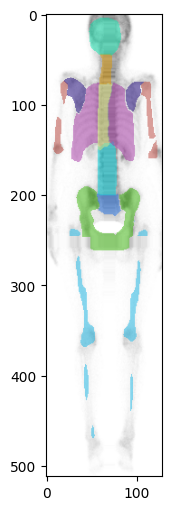

In [ ]:
# Inference Test
checkpoint_path = './work_dirs/tutorial/iter_5000.pth'
model = init_model(cfg_seg_t, checkpoint_path, 'cuda:0')

img = mmcv.imread(IMAGE_TEST)
result = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, img, result)
plt.imshow(mmcv.bgr2rgb(vis_result))

In [ ]:
locale.getpreferredencoding = getpreferredencoding

# Zip the checkpoint to download
!zip -r seg-t-5000-p.zip /content/mmsegmentation/work_dirs/tutorial

# Copy the file to own drive
!cp seg-t-5000-p.zip '/content/gdrive/MyDrive/Checkpoints'

  adding: content/mmsegmentation/work_dirs/tutorial/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/last_checkpoint (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230505_063456/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230505_063456/20230505_063456.log (deflated 73%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230505_063456/vis_data/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230505_063456/vis_data/scalars.json (deflated 69%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230505_063456/vis_data/config.py (deflated 75%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230505_063456/vis_data/20230505_064423.json (deflated 69%)
  adding: content/mmsegmentation/work_dirs/tutorial/iter_2500.pth (deflated 7%)
  adding: content/mmsegmentation/work_dirs/tutorial/segmenter_vit-t_mask_8xb1-160k_ade20k-512x512.py (deflated 75%)
  adding: content/mmsegmentation/work_dirs/tutorial/iter_5000.pth

## Small Variant

In [ ]:
cfg = Config.fromfile('configs/segmenter/segmenter_vit-s_mask_8xb1-160k_ade20k-512x512.py')

cfg.dataset_type = DATASET_TYPE
cfg.data_root = DATA_ROOT

cfg.train_dataloader.batch_size = BATCH_SIZE

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomResize', scale=(256, 1024), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(256, 1024), keep_ratio=True),
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]

cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
cfg.train_dataloader.dataset.ann_file = 'splits/train.txt'

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.val_dataloader.dataset.ann_file = 'splits/val.txt'

cfg.test_dataloader = cfg.val_dataloader
cfg.test_dataloader.dataset.ann_file = 'splits/test.txt'

cfg.load_from = 'checkpoints/segmenter_vit-s_mask_8x1_512x512_160k_ade20k_20220105_151706-511bb103.pth'

cfg.work_dir = './work_dirs/tutorial'

cfg.train_cfg.max_iters = MAX_ITERATIONS
cfg.train_cfg.val_interval = EVALUATION_INTERVAL
cfg.default_hooks.logger.interval = LOG_CONFIG_INTERVAL
cfg.default_hooks.checkpoint.interval = CHECKPOINT_CONFIG_INTERVAL

cfg['randomness'] = dict(seed=0)

print(f'Config:\n{cfg.pretty_text}')

cfg_seg_s = cfg

Config:
checkpoint = 'https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segmenter/vit_small_p16_384_20220308-410f6037.pth'
backbone_norm_cfg = dict(type='LN', eps=1e-06, requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[127.5, 127.5, 127.5],
    std=[127.5, 127.5, 127.5],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(512, 512))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[127.5, 127.5, 127.5],
        std=[127.5, 127.5, 127.5],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(512, 512)),
    pretrained=
    'https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segmenter/vit_small_p16_384_20220308-410f6037.pth',
    backbone=dict(
        type='VisionTransformer',
        img_size=(512, 512),
        patch_size=16,
        in_channels=3,
        embed_dims=384,
        num_layers=12,
        num_heads=6,
 

In [ ]:
runner_seg_s = Runner.from_cfg(cfg_seg_s)

05/05 07:18:26 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/content/mmsegmentation/mmseg/models/backbones/vit.py:218: UserWarning: DeprecationWarning: pretrained is deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is deprecated, '
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=Tr

05/05 07:18:28 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
05/05 07:18:28 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [ ]:
# start training
runner_seg_s.train()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


05/05 07:18:30 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segmenter/vit_small_p16_384_20220308-410f6037.pth


Downloading: "https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segmenter/vit_small_p16_384_20220308-410f6037.pth" to /root/.cache/torch/hub/checkpoints/vit_small_p16_384_20220308-410f6037.pth


Resize the pos_embed shape from torch.Size([1, 577, 384]) to torch.Size([1, 1025, 384])
Loads checkpoint by local backend from path: checkpoints/segmenter_vit-s_mask_8x1_512x512_160k_ade20k_20220105_151706-511bb103.pth
05/05 07:18:35 - mmengine - INFO - Load checkpoint from checkpoints/segmenter_vit-s_mask_8x1_512x512_160k_ade20k_20220105_151706-511bb103.pth
05/05 07:18:35 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
05/05 07:18:35 - mmengine - INFO - Checkpoints will be saved to /content/mmsegmentation/work_dirs/tutorial.
05/05 07:18:40 - mmengine - INFO - Exp name: segmenter_vit-s_mask_8xb1-160k_ade20k-512x512_20230505_071826
05/05 07:18:40 - mmengine - INFO - Iter(train) [   8/5000]  lr: 9.9996e-04  eta: 0:46:23  time: 0.5576  data_time: 0.0132  memory: 3947  loss: 1.7835  decode.loss_ce: 1.7835  decode.acc_seg: 62.1228
05/05 07:23:01 - mmengine - INFO - Iter(train) [ 50

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


05/05 07:23:02 - mmengine - INFO - per class results:
05/05 07:23:02 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 86.82 | 95.63 |
|  vertebra serviks | 66.76 | 82.49 |
|  vertebra toraks  | 76.16 |  90.9 |
|    tulang rusuk   | 79.67 | 87.96 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 65.77 |  76.6 |
|      humerus      | 41.64 | 93.72 |
| vertebra lumbalis |  73.3 | 84.21 |
| tulang kelangkang | 48.04 | 78.81 |
|      panggul      | 65.27 | 86.38 |
|    tulang paha    | 16.34 |  25.2 |
+-------------------+-------+-------+
05/05 07:23:02 - mmengine - INFO - Iter(val) [7/7]    aAcc: 77.0900  mIoU: 61.9800  mAcc: 80.1900  data_time: 0.0413  time: 0.1270
05/05 07:27:27 - mmengine - INFO - Exp name: segmenter_vit-s_mask_8xb1-160k_ade20k-512x512_20230505_071826
05/05 07:27:27 - mmengine - INFO - Iter(train) [1000/5000]  lr: 

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): VisionTransformer(
    (patch_embed): PatchEmbed(
      (adap_padding): AdaptivePadding()
      (projection): Conv2d(3, 384, kernel_size=(16, 16), stride=(16, 16))
    )
    (drop_after_pos): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (ln1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
        (attn): MultiheadAttention(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=384, out_features=384, bias=True)
          )
          (proj_drop): Dropout(p=0.0, inplace=False)
          (dropout_layer): Dropout(p=0.0, inplace=False)
        )
        (ln2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
        (ffn): FFN(
          (layers): Sequential(
            (0): Sequential(
              (0): Linear(in_features=384, out_features=1536, bias=True)
              (1): GELU(approximate='none

In [ ]:
# start validating
runner_seg_s.val()

05/05 08:02:55 - mmengine - INFO - per class results:
05/05 08:02:55 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 91.23 | 94.19 |
|  vertebra serviks | 73.73 | 87.04 |
|  vertebra toraks  | 78.53 | 85.41 |
|    tulang rusuk   | 81.99 | 90.29 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 64.92 | 69.24 |
|      humerus      | 57.93 | 80.01 |
| vertebra lumbalis | 77.29 | 93.12 |
| tulang kelangkang | 58.05 | 87.57 |
|      panggul      | 77.04 | 90.42 |
|    tulang paha    | 47.93 | 64.66 |
+-------------------+-------+-------+
05/05 08:02:55 - mmengine - INFO - Iter(val) [7/7]    aAcc: 83.3400  mIoU: 70.8600  mAcc: 84.1900  data_time: 0.0034  time: 0.0719


{'aAcc': 83.34, 'mIoU': 70.86, 'mAcc': 84.19}

In [ ]:
# start testing
runner_seg_s.test()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


05/05 08:02:57 - mmengine - INFO - per class results:
05/05 08:02:57 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 88.08 | 91.49 |
|  vertebra serviks | 70.82 | 85.45 |
|  vertebra toraks  | 76.55 | 88.05 |
|    tulang rusuk   | 84.26 | 89.18 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 62.06 | 65.18 |
|      humerus      | 55.75 | 74.77 |
| vertebra lumbalis | 68.96 | 93.71 |
| tulang kelangkang | 49.22 | 72.78 |
|      panggul      | 71.68 | 85.26 |
|    tulang paha    | 44.62 | 59.27 |
+-------------------+-------+-------+
05/05 08:02:57 - mmengine - INFO - Iter(test) [7/7]    aAcc: 79.9500  mIoU: 67.2000  mAcc: 80.5200  data_time: 0.0317  time: 0.1015


{'aAcc': 79.95, 'mIoU': 67.2, 'mAcc': 80.52}

/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: ./work_dirs/tutorial/iter_5000.pth
05/05 08:02:57 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


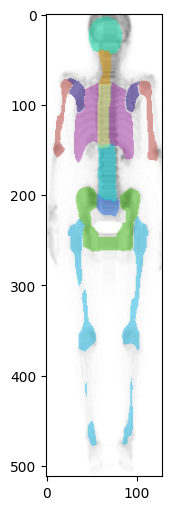

In [ ]:
# Inference Test
checkpoint_path = './work_dirs/tutorial/iter_5000.pth'
model = init_model(cfg_seg_s, checkpoint_path, 'cuda:0')

img = mmcv.imread(IMAGE_TEST)
result = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, img, result)
plt.imshow(mmcv.bgr2rgb(vis_result))

In [ ]:
locale.getpreferredencoding = getpreferredencoding

# Zip the checkpoint to download
!zip -r seg-sreal-5000-p.zip /content/mmsegmentation/work_dirs/tutorial

# Copy the file to own drive
!cp seg-sreal-5000-p.zip '/content/gdrive/MyDrive/Checkpoints'

  adding: content/mmsegmentation/work_dirs/tutorial/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/segmenter_vit-s_mask_8xb1-160k_ade20k-512x512.py (deflated 75%)
  adding: content/mmsegmentation/work_dirs/tutorial/last_checkpoint (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230505_071826/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230505_071826/20230505_071826.json (deflated 17%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230505_071826/20230505_071826.log (deflated 86%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230505_063456/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230505_063456/20230505_063456.log (deflated 73%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230505_063456/vis_data/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230505_063456/vis_data/20230505_071826.json (deflated 70%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230505_063

## Big Variant

In [ ]:
cfg = Config.fromfile('configs/segmenter/segmenter_vit-b_mask_8xb1-160k_ade20k-512x512.py')

cfg.dataset_type = DATASET_TYPE
cfg.data_root = DATA_ROOT

cfg.train_dataloader.batch_size = BATCH_SIZE

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomResize', scale=(256, 1024), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(256, 1024), keep_ratio=True),
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]

cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
cfg.train_dataloader.dataset.ann_file = 'splits/train.txt'

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.val_dataloader.dataset.ann_file = 'splits/val.txt'

cfg.test_dataloader = cfg.val_dataloader
cfg.test_dataloader.dataset.ann_file = 'splits/test.txt'

cfg.load_from = 'checkpoints/segmenter_vit-b_mask_8x1_512x512_160k_ade20k_20220105_151706-bc533b08.pth'

cfg.work_dir = './work_dirs/tutorial'

cfg.train_cfg.max_iters = MAX_ITERATIONS
cfg.train_cfg.val_interval = EVALUATION_INTERVAL
cfg.default_hooks.logger.interval = LOG_CONFIG_INTERVAL
cfg.default_hooks.checkpoint.interval = CHECKPOINT_CONFIG_INTERVAL

cfg['randomness'] = dict(seed=0)

print(f'Config:\n{cfg.pretty_text}')

cfg_seg_b = cfg

Config:
checkpoint = 'https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segmenter/vit_base_p16_384_20220308-96dfe169.pth'
backbone_norm_cfg = dict(type='LN', eps=1e-06, requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[127.5, 127.5, 127.5],
    std=[127.5, 127.5, 127.5],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(512, 512))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[127.5, 127.5, 127.5],
        std=[127.5, 127.5, 127.5],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(512, 512)),
    pretrained=
    'https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segmenter/vit_base_p16_384_20220308-96dfe169.pth',
    backbone=dict(
        type='VisionTransformer',
        img_size=(512, 512),
        patch_size=16,
        in_channels=3,
        embed_dims=768,
        num_layers=12,
        num_heads=12,
  

In [ ]:
runner_seg_b = Runner.from_cfg(cfg_seg_b)

05/07 12:14:17 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

/content/mmsegmentation/mmseg/models/backbones/vit.py:218: UserWarning: DeprecationWarning: pretrained is deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is deprecated, '
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


05/07 12:14:26 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
05/07 12:14:26 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [ ]:
# start training
runner_seg_b.train()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


05/07 12:14:27 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segmenter/vit_base_p16_384_20220308-96dfe169.pth


Downloading: "https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segmenter/vit_base_p16_384_20220308-96dfe169.pth" to /root/.cache/torch/hub/checkpoints/vit_base_p16_384_20220308-96dfe169.pth


Resize the pos_embed shape from torch.Size([1, 577, 768]) to torch.Size([1, 1025, 768])
Loads checkpoint by local backend from path: checkpoints/segmenter_vit-b_mask_8x1_512x512_160k_ade20k_20220105_151706-bc533b08.pth
05/07 12:14:48 - mmengine - INFO - Load checkpoint from checkpoints/segmenter_vit-b_mask_8x1_512x512_160k_ade20k_20220105_151706-bc533b08.pth
05/07 12:14:48 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
05/07 12:14:48 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
05/07 12:14:48 - mmengine - INFO - Checkpoints will be saved to /content/mmsegmentation/work_dirs/tutorial.
05/07 12:15:03 - mmengine - INFO - Exp name: segmenter_vit-b_mask_8xb1-160k_ade20k-512x512_20230507_121416
05/07 12:15:03 - mmengine - INFO - Iter(train) [   8/5000]  lr: 9.9996e-04  eta: 2:30:52  time: 1.8134  data_time: 0.0

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


05/07 12:23:37 - mmengine - INFO - per class results:
05/07 12:23:37 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 87.76 | 94.12 |
|  vertebra serviks | 14.83 | 15.26 |
|  vertebra toraks  | 52.61 | 79.93 |
|    tulang rusuk   | 61.11 | 95.46 |
|    tulang dada    | 49.91 | 67.12 |
|  tulang selangka  | 38.87 | 51.66 |
|   tulang belikat  | 48.35 | 81.77 |
|      humerus      | 40.33 |  82.1 |
| vertebra lumbalis |  52.7 | 64.86 |
| tulang kelangkang | 38.66 | 91.18 |
|      panggul      | 66.68 | 87.91 |
|    tulang paha    | 22.03 | 31.64 |
+-------------------+-------+-------+
05/07 12:23:37 - mmengine - INFO - Iter(val) [7/7]    aAcc: 75.6200  mIoU: 47.8200  mAcc: 70.2500  data_time: 0.0284  time: 0.2024
05/07 12:32:22 - mmengine - INFO - Exp name: segmenter_vit-b_mask_8xb1-160k_ade20k-512x512_20230507_121416
05/07 12:32:22 - mmengine - INFO - Iter(train) [1000/5000]  lr: 

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): VisionTransformer(
    (patch_embed): PatchEmbed(
      (adap_padding): AdaptivePadding()
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (drop_after_pos): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (ln1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): MultiheadAttention(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (proj_drop): Dropout(p=0.0, inplace=False)
          (dropout_layer): Dropout(p=0.0, inplace=False)
        )
        (ln2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (ffn): FFN(
          (layers): Sequential(
            (0): Sequential(
              (0): Linear(in_features=768, out_features=3072, bias=True)
              (1): GELU(approximate='none

In [ ]:
# start validating
runner_seg_b.val()

05/07 13:42:20 - mmengine - INFO - per class results:
05/07 13:42:20 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 88.96 |  93.7 |
|  vertebra serviks | 41.41 | 48.47 |
|  vertebra toraks  | 66.18 | 83.65 |
|    tulang rusuk   | 77.88 | 93.99 |
|    tulang dada    |  66.0 | 82.55 |
|  tulang selangka  | 53.27 | 63.63 |
|   tulang belikat  | 60.34 | 81.85 |
|      humerus      |  48.6 | 53.76 |
| vertebra lumbalis | 75.03 | 89.02 |
| tulang kelangkang |  59.4 | 80.99 |
|      panggul      | 79.31 | 94.27 |
|    tulang paha    | 53.66 | 61.32 |
+-------------------+-------+-------+
05/07 13:42:20 - mmengine - INFO - Iter(val) [7/7]    aAcc: 81.0700  mIoU: 64.1700  mAcc: 77.2700  data_time: 0.0048  time: 0.1675


{'aAcc': 81.07, 'mIoU': 64.17, 'mAcc': 77.27}

In [ ]:
# start testing
runner_seg_b.test()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


05/07 13:42:23 - mmengine - INFO - per class results:
05/07 13:42:23 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 89.23 | 93.39 |
|  vertebra serviks | 41.32 | 52.52 |
|  vertebra toraks  | 58.43 | 80.09 |
|    tulang rusuk   | 64.29 | 93.77 |
|    tulang dada    | 54.35 | 77.76 |
|  tulang selangka  | 49.93 | 60.48 |
|   tulang belikat  | 59.92 | 77.92 |
|      humerus      | 40.89 | 45.06 |
| vertebra lumbalis | 54.31 | 75.08 |
| tulang kelangkang | 45.38 | 75.88 |
|      panggul      | 74.53 | 88.33 |
|    tulang paha    | 54.92 | 62.48 |
+-------------------+-------+-------+
05/07 13:42:23 - mmengine - INFO - Iter(test) [7/7]    aAcc: 78.5800  mIoU: 57.2900  mAcc: 73.5600  data_time: 0.0512  time: 0.2140


{'aAcc': 78.58, 'mIoU': 57.29, 'mAcc': 73.56}

Loads checkpoint by local backend from path: ./work_dirs/tutorial/iter_5000.pth
05/07 13:43:24 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


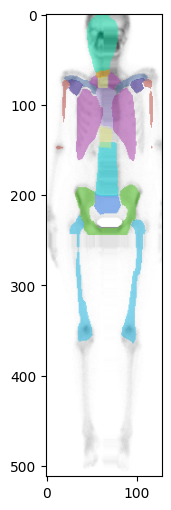

In [ ]:
# Inference Test
checkpoint_path = './work_dirs/tutorial/iter_5000.pth'
model = init_model(cfg_seg_b, checkpoint_path, 'cuda:0')

img = mmcv.imread(IMAGE_TEST)
result = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, img, result)
plt.imshow(mmcv.bgr2rgb(vis_result))

In [ ]:
locale.getpreferredencoding = getpreferredencoding

# Zip the checkpoint to download
!zip -r seg-b-5000-a.zip /content/mmsegmentation/work_dirs/tutorial

# Copy the file to own drive
!cp seg-b-5000-a.zip '/content/gdrive/MyDrive/Checkpoints'

  adding: content/mmsegmentation/work_dirs/tutorial/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230507_121416/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230507_121416/20230507_121416.json (deflated 17%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230507_121416/20230507_121416.log (deflated 86%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230507_121416/vis_data/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230507_121416/vis_data/scalars.json (deflated 70%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230507_121416/vis_data/20230507_121416.json (deflated 70%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230507_121416/vis_data/config.py (deflated 75%)
  adding: content/mmsegmentation/work_dirs/tutorial/last_checkpoint (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/iter_2500.pth (deflated 7%)
  adding: content/mmsegmentation/work_dirs/tutorial/segmenter_vit-b_mask_8xb1

## Large Variant

In [ ]:
cfg = Config.fromfile('configs/segmenter/segmenter_vit-l_mask_8xb1-160k_ade20k-512x512.py')

cfg.dataset_type = DATASET_TYPE
cfg.data_root = DATA_ROOT

cfg.train_dataloader.batch_size = BATCH_SIZE

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomResize', scale=(256, 1024), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(256, 1024), keep_ratio=True),
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]

cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
cfg.train_dataloader.dataset.ann_file = 'splits/train.txt'

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.val_dataloader.dataset.ann_file = 'splits/val.txt'

cfg.test_dataloader = cfg.val_dataloader
cfg.test_dataloader.dataset.ann_file = 'splits/test.txt'

cfg.load_from = 'checkpoints/segmenter_vit-l_mask_8x1_640x640_160k_ade20k_20220614_024513-4783a347.pth'

cfg.work_dir = './work_dirs/tutorial'

cfg.train_cfg.max_iters = MAX_ITERATIONS
cfg.train_cfg.val_interval = EVALUATION_INTERVAL
cfg.default_hooks.logger.interval = LOG_CONFIG_INTERVAL
cfg.default_hooks.checkpoint.interval = CHECKPOINT_CONFIG_INTERVAL

cfg['randomness'] = dict(seed=0)

print(f'Config:\n{cfg.pretty_text}')

cfg_seg_l = cfg

Config:
checkpoint = 'https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segmenter/vit_large_p16_384_20220308-d4efb41d.pth'
backbone_norm_cfg = dict(type='LN', eps=1e-06, requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[127.5, 127.5, 127.5],
    std=[127.5, 127.5, 127.5],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(640, 640))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[127.5, 127.5, 127.5],
        std=[127.5, 127.5, 127.5],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(640, 640)),
    pretrained=
    'https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segmenter/vit_large_p16_384_20220308-d4efb41d.pth',
    backbone=dict(
        type='VisionTransformer',
        img_size=(640, 640),
        patch_size=16,
        in_channels=3,
        embed_dims=1024,
        num_layers=24,
        num_heads=16,

In [ ]:
runner_seg_l = Runner.from_cfg(cfg_seg_l)

05/05 00:26:30 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [ ]:
# start training
runner_seg_l.train()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


05/05 00:26:58 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segmenter/vit_large_p16_384_20220308-d4efb41d.pth
Resize the pos_embed shape from torch.Size([1, 577, 1024]) to torch.Size([1, 1601, 1024])
Loads checkpoint by local backend from path: checkpoints/segmenter_vit-l_mask_8x1_640x640_160k_ade20k_20220614_024513-4783a347.pth
05/05 00:27:07 - mmengine - INFO - Load checkpoint from checkpoints/segmenter_vit-l_mask_8x1_640x640_160k_ade20k_20220614_024513-4783a347.pth
05/05 00:27:07 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
05/05 00:27:07 - mmengine - INFO - Checkpoints will be saved to /content/mmsegmentation/work_dirs/tutorial.


OutOfMemoryError: ignored

In [ ]:
# start validating
runner_seg_l.val()

In [ ]:
# start testing
runner_seg_l.test()

In [ ]:
# Inference Test
checkpoint_path = './work_dirs/tutorial/iter_5000.pth'
model = init_model(cfg_seg_l, checkpoint_path, 'cuda:0')

img = mmcv.imread(IMAGE_TEST)
result = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, img, result)
plt.imshow(mmcv.bgr2rgb(vis_result))

## Inference Comparison

In [ ]:
img = mmcv.imread('iccv09Data/images/0005079.jpg')

model.cfg = cfg
result = inference_segmentor(model, img)
plt.figure(figsize=(4, 3))
show_result_pyplot(model, img, result, palette)
model2.cfg = cfg
result = inference_segmentor(model2, img)
plt.figure(figsize=(4, 3))
show_result_pyplot(model2, img, result, palette)
model3.cfg = cfg
result = inference_segmentor(model3, img)
plt.figure(figsize=(4, 3))
show_result_pyplot(model3, img, result, palette)

# DANet

## 50 Variant

In [ ]:
cfg = Config.fromfile('configs/danet/danet_r50-d8_4xb4-160k_ade20k-512x512.py')

cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.num_classes = 13
cfg.model.auxiliary_head.num_classes = 13

cfg.dataset_type = DATASET_TYPE
cfg.data_root = DATA_ROOT

cfg.train_dataloader.batch_size = BATCH_SIZE

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomResize', scale=(256, 1024), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(256, 1024), keep_ratio=True),
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]

cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
cfg.train_dataloader.dataset.ann_file = 'splits/train.txt'

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.val_dataloader.dataset.ann_file = 'splits/val.txt'

cfg.test_dataloader = cfg.val_dataloader
cfg.test_dataloader.dataset.ann_file = 'splits/test.txt'

cfg.load_from = 'checkpoints/danet_r50-d8_512x512_160k_ade20k_20200616_082340-9cb35dcd.pth'

cfg.work_dir = './work_dirs/tutorial'

cfg.train_cfg.max_iters = MAX_ITERATIONS
cfg.train_cfg.val_interval = EVALUATION_INTERVAL
cfg.default_hooks.logger.interval = LOG_CONFIG_INTERVAL
cfg.default_hooks.checkpoint.interval = CHECKPOINT_CONFIG_INTERVAL
cfg['randomness'] = dict(seed=0)

print(f'Config:\n{cfg.pretty_text}')

cfg_danet_50 = cfg

Config:
norm_cfg = dict(type='BN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(512, 512))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(512, 512)),
    pretrained='open-mmlab://resnet50_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='DAHead',
        in_channels=2048,
        in_index=3,
        ch

In [ ]:
runner_danet_50 = Runner.from_cfg(cfg_danet_50)

05/31 00:09:26 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '


05/31 00:09:27 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
05/31 00:09:27 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [ ]:
# start training
runner_danet_50.train()

05/31 00:10:28 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
05/31 00:10:29 - mmengine - INFO - load model from: open-mmlab://resnet50_v1c
05/31 00:10:29 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet50_v1c
05/31 00:10:29 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

Loads checkpoint by local backend from path: checkpoints/danet_r50-d8_512x512_160k_ade20k_20200616_082340-9cb35dcd.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([150, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([13, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([150]) from checkpoint, the shape in current model is torch.Size([13]).
size mismatch for decode_head.pam_conv_seg.weight: copying a param wi

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


05/31 00:17:33 - mmengine - INFO - per class results:
05/31 00:17:33 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 84.33 | 99.03 |
|  vertebra serviks | 48.34 | 62.66 |
|  vertebra toraks  | 72.47 | 77.47 |
|    tulang rusuk   | 80.98 | 85.11 |
|    tulang dada    | 81.82 | 91.68 |
|  tulang selangka  | 58.65 | 80.56 |
|   tulang belikat  | 63.77 | 78.19 |
|      humerus      | 46.74 | 52.81 |
| vertebra lumbalis | 77.65 | 82.71 |
| tulang kelangkang | 65.86 | 74.52 |
|      panggul      | 82.63 | 91.48 |
|    tulang paha    | 63.93 | 66.41 |
+-------------------+-------+-------+
05/31 00:17:33 - mmengine - INFO - Iter(val) [7/7]    aAcc: 80.4000  mIoU: 68.9300  mAcc: 78.5500  data_time: 0.0436  time: 0.1564
05/31 00:24:34 - mmengine - INFO - Iter(train) [800/800]  lr: 9.9555e-03  eta: 0:00:00  time: 1.0533  data_time: 0.0085  memory: 4903  loss: 0.1542  decode.pam_cam.loss_ce

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-0

In [ ]:
# start validating
runner_danet_50.val()

05/31 00:24:39 - mmengine - INFO - per class results:
05/31 00:24:39 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 89.65 | 95.21 |
|  vertebra serviks | 49.87 | 70.56 |
|  vertebra toraks  | 78.84 | 84.63 |
|    tulang rusuk   | 84.68 | 89.57 |
|    tulang dada    | 80.12 | 85.79 |
|  tulang selangka  | 64.04 | 80.87 |
|   tulang belikat  |  69.7 | 81.73 |
|      humerus      | 71.81 | 80.25 |
| vertebra lumbalis | 83.21 | 87.14 |
| tulang kelangkang | 69.35 | 81.75 |
|      panggul      | 82.17 | 90.51 |
|    tulang paha    | 79.56 |  86.2 |
+-------------------+-------+-------+
05/31 00:24:39 - mmengine - INFO - Iter(val) [7/7]    aAcc: 87.8400  mIoU: 75.2500  mAcc: 84.5200  data_time: 0.0049  time: 0.1022


{'aAcc': 87.84, 'mIoU': 75.25, 'mAcc': 84.52}

In [ ]:
# start testing
runner_danet_50.test()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


05/31 00:24:41 - mmengine - INFO - per class results:
05/31 00:24:41 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 93.31 | 96.11 |
|  vertebra serviks | 54.02 | 75.33 |
|  vertebra toraks  | 73.17 | 84.02 |
|    tulang rusuk   | 81.45 | 90.87 |
|    tulang dada    | 74.54 | 78.86 |
|  tulang selangka  | 59.96 | 75.75 |
|   tulang belikat  | 69.81 | 79.77 |
|      humerus      | 68.79 | 81.88 |
| vertebra lumbalis |  76.4 | 82.57 |
| tulang kelangkang | 53.75 | 73.17 |
|      panggul      |  79.8 | 90.15 |
|    tulang paha    | 78.14 | 85.36 |
+-------------------+-------+-------+
05/31 00:24:41 - mmengine - INFO - Iter(test) [7/7]    aAcc: 87.4400  mIoU: 71.9300  mAcc: 82.8200  data_time: 0.0358  time: 0.1322


{'aAcc': 87.44, 'mIoU': 71.93, 'mAcc': 82.82}

/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: ./work_dirs/tutorial/iter_800.pth
05/31 00:24:42 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


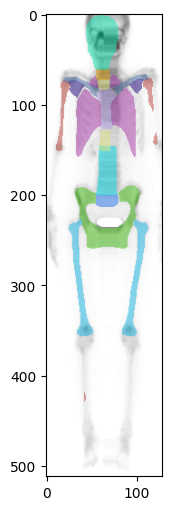

In [ ]:
# Inference Test
checkpoint_path = './work_dirs/tutorial/iter_800.pth'
model = init_model(cfg_danet_50, checkpoint_path, 'cuda:0')

img = mmcv.imread(IMAGE_TEST)
result = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, img, result)
plt.imshow(mmcv.bgr2rgb(vis_result))

In [ ]:
locale.getpreferredencoding = getpreferredencoding

# Zip the checkpoint to download
!zip -r danet-50-5000-p.zip /content/mmsegmentation/work_dirs/tutorial

# # Copy the file to own drive
# !cp danet-50-5000-p.zip '/content/gdrive/MyDrive/Checkpoints'

  adding: content/mmsegmentation/work_dirs/tutorial/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230530_231031/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230530_231031/vis_data/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230530_231031/vis_data/config.py (deflated 75%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230530_231031/vis_data/scalars.json (deflated 69%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230530_231031/vis_data/20230530_231031.json (deflated 64%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230530_231031/vis_data/20230531_000926.json (deflated 64%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230530_231031/20230530_231031.log (deflated 85%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230530_231031/20230530_231031.json (deflated 16%)
  adding: content/mmsegmentation/work_dirs/tutorial/iter_800.pth (deflated 7%)
  adding: content/mmsegmentation/work_dirs/tu

## 50 Variant - 32 dam channel

### Training

In [ ]:
cfg = Config.fromfile('configs/danet/danet_r50-d8_4xb4-160k_ade20k-512x512.py')

cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.num_classes = 13
cfg.model.auxiliary_head.num_classes = 13

cfg.model.decode_head.pam_channels = 32

cfg.dataset_type = DATASET_TYPE
cfg.data_root = DATA_ROOT

cfg.train_dataloader.batch_size = BATCH_SIZE

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomResize', scale=(256, 1024), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(256, 1024), keep_ratio=True),
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]

cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
cfg.train_dataloader.dataset.ann_file = 'splits/train.txt'

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.val_dataloader.dataset.ann_file = 'splits/val.txt'

cfg.test_dataloader = cfg.val_dataloader
cfg.test_dataloader.dataset.ann_file = 'splits/test.txt'

cfg.load_from = 'checkpoints/danet_r50-d8_512x512_160k_ade20k_20200616_082340-9cb35dcd.pth'

cfg.work_dir = './work_dirs/tutorial'

cfg.train_cfg.max_iters = MAX_ITERATIONS
cfg.train_cfg.val_interval = EVALUATION_INTERVAL
cfg.default_hooks.logger.interval = LOG_CONFIG_INTERVAL
cfg.default_hooks.checkpoint.interval = CHECKPOINT_CONFIG_INTERVAL
cfg['randomness'] = dict(seed=0)

print(f'Config:\n{cfg.pretty_text}')

cfg_danet_50 = cfg

Config:
norm_cfg = dict(type='BN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(512, 512))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(512, 512)),
    pretrained='open-mmlab://resnet50_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='DAHead',
        in_channels=2048,
        in_index=3,
        ch

In [ ]:
runner_danet_50 = Runner.from_cfg(cfg_danet_50)

06/03 04:07:04 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ig

06/03 04:07:06 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/03 04:07:06 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [ ]:
# start training
runner_danet_50.train()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


06/03 04:07:08 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
06/03 04:07:08 - mmengine - INFO - load model from: open-mmlab://resnet50_v1c
06/03 04:07:08 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet50_v1c


Downloading: "https://download.openmmlab.com/pretrain/third_party/resnet50_v1c-2cccc1ad.pth" to /root/.cache/torch/hub/checkpoints/resnet50_v1c-2cccc1ad.pth


06/03 04:07:12 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

Loads checkpoint by local backend from path: checkpoints/danet_r50-d8_512x512_160k_ade20k_20200616_082340-9cb35dcd.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([150, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([13, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([150]) from checkpoint, the shape in current model is torch.Size([13]).
size mismatch for decode_head.pam.key_project.weight: copying a param with shape torch.Size([64, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 512, 1, 1]).
size mismatch for decode_head.pam.key_project.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([32])

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


06/03 04:15:27 - mmengine - INFO - per class results:
06/03 04:15:27 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 91.39 | 98.88 |
|  vertebra serviks | 69.81 | 93.06 |
|  vertebra toraks  | 76.32 | 88.15 |
|    tulang rusuk   | 83.35 | 91.09 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 75.33 | 85.02 |
|      humerus      | 77.11 | 90.58 |
| vertebra lumbalis | 74.22 | 87.01 |
| tulang kelangkang | 65.18 | 99.77 |
|      panggul      | 82.19 | 87.88 |
|    tulang paha    | 55.06 | 88.05 |
+-------------------+-------+-------+
06/03 04:15:27 - mmengine - INFO - Iter(val) [7/7]    aAcc: 90.1900  mIoU: 75.0000  mAcc: 90.9500  data_time: 0.0491  time: 0.1607
06/03 04:23:41 - mmengine - INFO - Exp name: danet_r50-d8_4xb4-160k_ade20k-512x512_20230603_040704
06/03 04:23:41 - mmengine - INFO - Iter(train) [1000/5000]  lr: 9.9444e-

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-0

### Result

In [ ]:
# start validating
runner_danet_50.val()

06/03 05:29:29 - mmengine - INFO - per class results:
06/03 05:29:29 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 93.64 | 98.99 |
|  vertebra serviks | 77.92 | 87.63 |
|  vertebra toraks  | 81.95 |  90.3 |
|    tulang rusuk   | 84.68 | 92.37 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 76.77 | 88.82 |
|      humerus      | 76.72 |  87.7 |
| vertebra lumbalis | 80.08 | 87.29 |
| tulang kelangkang | 72.73 | 98.54 |
|      panggul      | 84.24 | 90.54 |
|    tulang paha    | 72.66 | 85.75 |
+-------------------+-------+-------+
06/03 05:29:29 - mmengine - INFO - Iter(val) [7/7]    aAcc: 90.5800  mIoU: 80.1400  mAcc: 90.7900  data_time: 0.0039  time: 0.0983


{'aAcc': 90.58, 'mIoU': 80.14, 'mAcc': 90.79}

In [ ]:
# start testing
runner_danet_50.test()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


06/03 05:29:31 - mmengine - INFO - per class results:
06/03 05:29:31 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 92.86 | 98.85 |
|  vertebra serviks | 78.99 | 90.15 |
|  vertebra toraks  | 81.78 | 92.07 |
|    tulang rusuk   |  88.7 | 92.63 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 80.88 | 89.77 |
|      humerus      | 75.38 | 86.84 |
| vertebra lumbalis | 82.84 |  90.1 |
| tulang kelangkang | 67.06 | 87.84 |
|      panggul      | 81.45 | 88.51 |
|    tulang paha    | 76.72 | 90.65 |
+-------------------+-------+-------+
06/03 05:29:31 - mmengine - INFO - Iter(test) [7/7]    aAcc: 91.2500  mIoU: 80.6700  mAcc: 90.7400  data_time: 0.0466  time: 0.1453


{'aAcc': 91.25, 'mIoU': 80.67, 'mAcc': 90.74}

/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: ./work_dirs/tutorial/iter_5000.pth
06/03 05:29:33 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


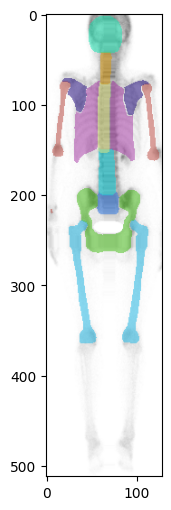

In [ ]:
# Inference Test
checkpoint_path = './work_dirs/tutorial/iter_5000.pth'
model = init_model(cfg_danet_50, checkpoint_path, 'cuda:0')

img = mmcv.imread(IMAGE_TEST)
result = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, img, result)
plt.imshow(mmcv.bgr2rgb(vis_result))

In [ ]:
locale.getpreferredencoding = getpreferredencoding

# Zip the checkpoint to download
!zip -r danet-50-5000-p-32.zip /content/mmsegmentation/work_dirs/tutorial

# Copy the file to own drive
!cp danet-50-5000-p-32.zip '/content/gdrive/MyDrive/Checkpoints'

  adding: content/mmsegmentation/work_dirs/tutorial/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230603_003921/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230603_003921/20230603_003921.log (deflated 87%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230603_003921/20230603_003921.json (deflated 18%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230603_003921/vis_data/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230603_003921/vis_data/config.py (deflated 75%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230603_003921/vis_data/20230603_003921.json (deflated 70%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230603_003921/vis_data/20230603_040704.json (deflated 70%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230603_003921/vis_data/scalars.json (deflated 72%)
  adding: content/mmsegmentation/work_dirs/tutorial/danet_r101-d8_4xb4-160k_ade20k-512x512.py (deflated 75%)
  adding: conte

## 50 Variant - 16 dam channel

### Training

In [ ]:
cfg = Config.fromfile('configs/danet/danet_r50-d8_4xb4-160k_ade20k-512x512.py')

cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.num_classes = 13
cfg.model.auxiliary_head.num_classes = 13

cfg.model.decode_head.pam_channels = 16

cfg.dataset_type = DATASET_TYPE
cfg.data_root = DATA_ROOT

cfg.train_dataloader.batch_size = BATCH_SIZE

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomResize', scale=(256, 1024), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(256, 1024), keep_ratio=True),
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]

cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
cfg.train_dataloader.dataset.ann_file = 'splits/train.txt'

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.val_dataloader.dataset.ann_file = 'splits/val.txt'

cfg.test_dataloader = cfg.val_dataloader
cfg.test_dataloader.dataset.ann_file = 'splits/test.txt'

cfg.load_from = 'checkpoints/danet_r50-d8_512x512_160k_ade20k_20200616_082340-9cb35dcd.pth'

cfg.work_dir = './work_dirs/tutorial'

cfg.train_cfg.max_iters = MAX_ITERATIONS
cfg.train_cfg.val_interval = EVALUATION_INTERVAL
cfg.default_hooks.logger.interval = LOG_CONFIG_INTERVAL
cfg.default_hooks.checkpoint.interval = CHECKPOINT_CONFIG_INTERVAL
cfg['randomness'] = dict(seed=0)

print(f'Config:\n{cfg.pretty_text}')

cfg_danet_50 = cfg

Config:
norm_cfg = dict(type='BN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(512, 512))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(512, 512)),
    pretrained='open-mmlab://resnet50_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='DAHead',
        in_channels=2048,
        in_index=3,
        ch

In [ ]:
runner_danet_50 = Runner.from_cfg(cfg_danet_50)

06/04 05:40:29 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


06/04 05:40:35 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/04 05:40:35 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [ ]:
# start training
runner_danet_50.train()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


06/04 05:40:36 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
06/04 05:40:36 - mmengine - INFO - load model from: open-mmlab://resnet50_v1c
06/04 05:40:36 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet50_v1c


Downloading: "https://download.openmmlab.com/pretrain/third_party/resnet50_v1c-2cccc1ad.pth" to /root/.cache/torch/hub/checkpoints/resnet50_v1c-2cccc1ad.pth


06/04 05:40:40 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

Loads checkpoint by local backend from path: checkpoints/danet_r50-d8_512x512_160k_ade20k_20200616_082340-9cb35dcd.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([150, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([13, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([150]) from checkpoint, the shape in current model is torch.Size([13]).
size mismatch for decode_head.pam.key_project.weight: copying a param with shape torch.Size([64, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([16, 512, 1, 1]).
size mismatch for decode_head.pam.key_project.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([16])

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


06/04 05:50:12 - mmengine - INFO - per class results:
06/04 05:50:12 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 92.58 | 97.47 |
|  vertebra serviks |  70.6 | 90.95 |
|  vertebra toraks  | 78.87 | 90.57 |
|    tulang rusuk   | 83.97 | 92.28 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 74.41 |  85.9 |
|      humerus      | 75.88 | 90.85 |
| vertebra lumbalis | 75.35 | 82.89 |
| tulang kelangkang | 67.56 | 96.15 |
|      panggul      | 83.26 | 88.56 |
|    tulang paha    | 54.01 | 89.58 |
+-------------------+-------+-------+
06/04 05:50:12 - mmengine - INFO - Iter(val) [7/7]    aAcc: 90.6900  mIoU: 75.6500  mAcc: 90.5200  data_time: 0.0350  time: 0.4898
06/04 05:59:15 - mmengine - INFO - Exp name: danet_r50-d8_4xb4-160k_ade20k-512x512_20230604_054027
06/04 05:59:15 - mmengine - INFO - Iter(train) [1000/5000]  lr: 9.9444e-

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-0

### Result

In [ ]:
# start validating
runner_danet_50.val()

06/04 07:11:39 - mmengine - INFO - per class results:
06/04 07:11:39 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 93.53 | 98.32 |
|  vertebra serviks | 76.61 | 86.45 |
|  vertebra toraks  | 82.61 | 90.95 |
|    tulang rusuk   | 85.21 |  93.3 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 76.36 | 89.12 |
|      humerus      | 77.09 | 88.93 |
| vertebra lumbalis | 80.12 | 87.22 |
| tulang kelangkang | 70.66 | 97.72 |
|      panggul      | 84.36 | 91.29 |
|    tulang paha    | 71.66 | 84.73 |
+-------------------+-------+-------+
06/04 07:11:39 - mmengine - INFO - Iter(val) [7/7]    aAcc: 90.8200  mIoU: 79.8200  mAcc: 90.8000  data_time: 0.0071  time: 0.1094


{'aAcc': 90.82, 'mIoU': 79.82, 'mAcc': 90.8}

In [ ]:
# start testing
runner_danet_50.test()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


06/04 07:11:41 - mmengine - INFO - per class results:
06/04 07:11:41 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 93.21 | 98.41 |
|  vertebra serviks | 77.81 | 89.65 |
|  vertebra toraks  | 81.55 | 91.83 |
|    tulang rusuk   |  88.2 | 92.32 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 81.31 | 92.04 |
|      humerus      | 75.08 | 87.92 |
| vertebra lumbalis | 83.19 | 90.25 |
| tulang kelangkang | 65.25 | 87.84 |
|      panggul      | 80.42 | 88.41 |
|    tulang paha    |  77.8 | 89.58 |
+-------------------+-------+-------+
06/04 07:11:41 - mmengine - INFO - Iter(test) [7/7]    aAcc: 91.2000  mIoU: 80.3800  mAcc: 90.8200  data_time: 0.0289  time: 0.1307


{'aAcc': 91.2, 'mIoU': 80.38, 'mAcc': 90.82}

/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: ./work_dirs/tutorial/iter_5000.pth
06/04 07:11:42 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


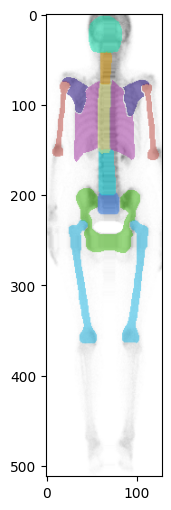

In [ ]:
# Inference Test
checkpoint_path = './work_dirs/tutorial/iter_5000.pth'
model = init_model(cfg_danet_50, checkpoint_path, 'cuda:0')

img = mmcv.imread(IMAGE_TEST)
result = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, img, result)
plt.imshow(mmcv.bgr2rgb(vis_result))

In [ ]:
locale.getpreferredencoding = getpreferredencoding

# Zip the checkpoint to download
!zip -r danet-50-5000-p-16.zip /content/mmsegmentation/work_dirs/tutorial

# Copy the file to own drive
!cp danet-50-5000-p-16.zip '/content/gdrive/MyDrive/Checkpoints'

  adding: content/mmsegmentation/work_dirs/tutorial/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/last_checkpoint (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/iter_5000.pth (deflated 7%)
  adding: content/mmsegmentation/work_dirs/tutorial/danet_r50-d8_4xb4-160k_ade20k-512x512.py (deflated 75%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230604_054027/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230604_054027/20230604_054027.log (deflated 85%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230604_054027/20230604_054027.json (deflated 18%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230604_054027/vis_data/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230604_054027/vis_data/config.py (deflated 75%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230604_054027/vis_data/20230604_054027.json (deflated 70%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230604_054027/vis_da

## 100 Variant

In [ ]:
cfg = Config.fromfile('configs/danet/danet_r101-d8_4xb4-160k_ade20k-512x512.py')

cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.num_classes = 13
cfg.model.auxiliary_head.num_classes = 13

cfg.dataset_type = DATASET_TYPE
cfg.data_root = DATA_ROOT

cfg.train_dataloader.batch_size = BATCH_SIZE

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomResize', scale=(256, 1024), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(256, 1024), keep_ratio=True),
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]

cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
cfg.train_dataloader.dataset.ann_file = 'splits/train.txt'

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.val_dataloader.dataset.ann_file = 'splits/val.txt'

cfg.test_dataloader = cfg.val_dataloader
cfg.test_dataloader.dataset.ann_file = 'splits/test.txt'

cfg.load_from = 'checkpoints/danet_r101-d8_512x512_160k_ade20k_20200616_082348-23bf12f9.pth'

cfg.work_dir = './work_dirs/tutorial'

cfg.train_cfg.max_iters = MAX_ITERATIONS
cfg.train_cfg.val_interval = EVALUATION_INTERVAL
cfg.default_hooks.logger.interval = LOG_CONFIG_INTERVAL
cfg.default_hooks.checkpoint.interval = CHECKPOINT_CONFIG_INTERVAL
cfg['randomness'] = dict(seed=0)

print(f'Config:\n{cfg.pretty_text}')

cfg_danet_100 = cfg

Config:
norm_cfg = dict(type='BN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(512, 512))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(512, 512)),
    pretrained='open-mmlab://resnet101_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='DAHead',
        in_channels=2048,
        in_index=3,
        

In [ ]:
runner_danet_100 = Runner.from_cfg(cfg_danet_100)

05/07 05:12:41 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '


05/07 05:12:43 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
05/07 05:12:43 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [ ]:
# start training
runner_danet_100.train()

05/07 05:12:44 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
05/07 05:12:44 - mmengine - INFO - load model from: open-mmlab://resnet101_v1c
05/07 05:12:44 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet101_v1c


Downloading: "https://download.openmmlab.com/pretrain/third_party/resnet101_v1c-e67eebb6.pth" to /root/.cache/torch/hub/checkpoints/resnet101_v1c-e67eebb6.pth


05/07 05:12:53 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

Loads checkpoint by local backend from path: checkpoints/danet_r101-d8_512x512_160k_ade20k_20200616_082348-23bf12f9.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([150, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([13, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([150]) from checkpoint, the shape in current model is torch.Size([13]).
size mismatch for decode_head.pam_conv_seg.weight: copying a param with shape torch.Size([150, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([13, 512, 1, 1]).
size mismatch for decode_head.pam_conv_seg.bias: copying a param with shape torch.Size([150]) from checkpoint, the shape in current model is torch.Size([13]).
s

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


05/07 05:24:51 - mmengine - INFO - per class results:
05/07 05:24:51 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 93.65 | 97.58 |
|  vertebra serviks | 70.75 | 92.63 |
|  vertebra toraks  | 74.86 | 80.31 |
|    tulang rusuk   | 82.75 | 92.52 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 74.39 | 87.35 |
|      humerus      | 77.02 | 93.73 |
| vertebra lumbalis | 75.14 | 87.55 |
| tulang kelangkang | 63.58 | 99.36 |
|      panggul      | 82.47 | 89.26 |
|    tulang paha    | 59.53 | 87.91 |
+-------------------+-------+-------+
05/07 05:24:51 - mmengine - INFO - Iter(val) [7/7]    aAcc: 90.6200  mIoU: 75.4100  mAcc: 90.8200  data_time: 0.0325  time: 0.1747
05/07 05:36:50 - mmengine - INFO - Exp name: danet_r101-d8_4xb4-160k_ade20k-512x512_20230507_051241
05/07 05:36:50 - mmengine - INFO - Iter(train) [1000/5000]  lr: 9.9444e

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-0

In [ ]:
# start validating
runner_danet_100.val()

05/07 07:12:49 - mmengine - INFO - per class results:
05/07 07:12:49 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 93.92 |  97.1 |
|  vertebra serviks | 80.24 | 90.24 |
|  vertebra toraks  | 82.02 | 88.34 |
|    tulang rusuk   | 85.17 | 92.63 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 77.16 | 87.57 |
|      humerus      | 77.93 | 87.57 |
| vertebra lumbalis | 79.83 | 87.45 |
| tulang kelangkang | 73.05 | 96.03 |
|      panggul      | 85.98 | 91.63 |
|    tulang paha    | 74.65 | 84.01 |
+-------------------+-------+-------+
05/07 07:12:49 - mmengine - INFO - Iter(val) [7/7]    aAcc: 90.1200  mIoU: 80.9900  mAcc: 90.2600  data_time: 0.0058  time: 0.1456


{'aAcc': 90.12, 'mIoU': 80.99, 'mAcc': 90.26}

In [ ]:
# start testing
runner_danet_100.test()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


05/07 07:12:51 - mmengine - INFO - per class results:
05/07 07:12:51 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 94.02 | 97.63 |
|  vertebra serviks | 79.68 | 91.27 |
|  vertebra toraks  | 80.95 |  89.9 |
|    tulang rusuk   | 88.94 | 92.77 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 80.99 | 88.56 |
|      humerus      | 74.79 | 83.35 |
| vertebra lumbalis |  82.7 | 90.05 |
| tulang kelangkang | 66.73 | 85.75 |
|      panggul      | 81.28 | 88.24 |
|    tulang paha    | 77.04 | 87.26 |
+-------------------+-------+-------+
05/07 07:12:51 - mmengine - INFO - Iter(test) [7/7]    aAcc: 90.0100  mIoU: 80.7100  mAcc: 89.4800  data_time: 0.0319  time: 0.1709


{'aAcc': 90.01, 'mIoU': 80.71, 'mAcc': 89.48}

/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: ./work_dirs/tutorial/iter_5000.pth
05/07 07:12:53 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


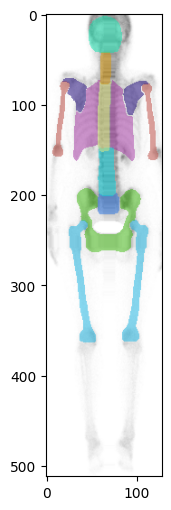

In [ ]:
# Inference Test
checkpoint_path = './work_dirs/tutorial/iter_5000.pth'
model = init_model(cfg_danet_100, checkpoint_path, 'cuda:0')

img = mmcv.imread(IMAGE_TEST)
result = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, img, result)
plt.imshow(mmcv.bgr2rgb(vis_result))

In [ ]:
locale.getpreferredencoding = getpreferredencoding

# Zip the checkpoint to download
!zip -r danet-100-5000-p.zip /content/mmsegmentation/work_dirs/tutorial

# # Copy the file to own drive
# !cp danet-100-5000-p.zip '/content/gdrive/MyDrive/Checkpoints'

  adding: content/mmsegmentation/work_dirs/tutorial/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/last_checkpoint (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/danet_r50-d8_4xb4-160k_ade20k-512x512.py (deflated 75%)
  adding: content/mmsegmentation/work_dirs/tutorial/danet_r101-d8_4xb4-160k_ade20k-512x512.py (deflated 75%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230507_051241/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230507_051241/20230507_051241.json (deflated 18%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230507_051241/20230507_051241.log (deflated 88%)
  adding: content/mmsegmentation/work_dirs/tutorial/iter_2500.pth (deflated 7%)
  adding: content/mmsegmentation/work_dirs/tutorial/iter_5000.pth (deflated 7%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230507_034816/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230507_034816/20230507_034816.json (deflated 17%)
  add

In [ ]:
# Copy the file to own drive
!cp danet-100-5000-p.zip '/content/gdrive/MyDrive/Checkpoints'

## 100 Variant 32 dam channel

### Training

In [ ]:
cfg = Config.fromfile('configs/danet/danet_r101-d8_4xb4-160k_ade20k-512x512.py')

cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.num_classes = 13
cfg.model.auxiliary_head.num_classes = 13

cfg.model.decode_head.pam_channels = 32

cfg.dataset_type = DATASET_TYPE
cfg.data_root = DATA_ROOT

cfg.train_dataloader.batch_size = BATCH_SIZE

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomResize', scale=(256, 1024), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(256, 1024), keep_ratio=True),
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]

cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
cfg.train_dataloader.dataset.ann_file = 'splits/train.txt'

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.val_dataloader.dataset.ann_file = 'splits/val.txt'

cfg.test_dataloader = cfg.val_dataloader
cfg.test_dataloader.dataset.ann_file = 'splits/test.txt'

cfg.load_from = 'checkpoints/danet_r101-d8_512x512_160k_ade20k_20200616_082348-23bf12f9.pth'

cfg.work_dir = './work_dirs/tutorial'

cfg.train_cfg.max_iters = MAX_ITERATIONS
cfg.train_cfg.val_interval = EVALUATION_INTERVAL
cfg.default_hooks.logger.interval = LOG_CONFIG_INTERVAL
cfg.default_hooks.checkpoint.interval = CHECKPOINT_CONFIG_INTERVAL
cfg['randomness'] = dict(seed=0)

print(f'Config:\n{cfg.pretty_text}')

cfg_danet_100 = cfg

Config:
norm_cfg = dict(type='BN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(512, 512))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(512, 512)),
    pretrained='open-mmlab://resnet101_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='DAHead',
        in_channels=2048,
        in_index=3,
        

In [ ]:
runner_danet_100 = Runner.from_cfg(cfg_danet_100)

06/04 07:12:06 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '


06/04 07:12:08 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/04 07:12:08 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [ ]:
# start training
runner_danet_100.train()

06/04 07:12:10 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
06/04 07:12:11 - mmengine - INFO - load model from: open-mmlab://resnet101_v1c
06/04 07:12:11 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet101_v1c


Downloading: "https://download.openmmlab.com/pretrain/third_party/resnet101_v1c-e67eebb6.pth" to /root/.cache/torch/hub/checkpoints/resnet101_v1c-e67eebb6.pth


06/04 07:12:20 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

Loads checkpoint by local backend from path: checkpoints/danet_r101-d8_512x512_160k_ade20k_20200616_082348-23bf12f9.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([150, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([13, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([150]) from checkpoint, the shape in current model is torch.Size([13]).
size mismatch for decode_head.pam.key_project.weight: copying a param with shape torch.Size([64, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([32, 512, 1, 1]).
size mismatch for decode_head.pam.key_project.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([32]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


06/04 07:25:34 - mmengine - INFO - per class results:
06/04 07:25:34 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 93.67 | 96.82 |
|  vertebra serviks | 71.19 | 95.29 |
|  vertebra toraks  | 78.13 | 85.67 |
|    tulang rusuk   | 83.37 | 93.39 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 74.39 | 88.96 |
|      humerus      | 75.88 | 93.44 |
| vertebra lumbalis | 77.12 | 91.23 |
| tulang kelangkang | 72.89 | 96.67 |
|      panggul      | 82.94 |  92.7 |
|    tulang paha    | 55.79 | 92.49 |
+-------------------+-------+-------+
06/04 07:25:34 - mmengine - INFO - Iter(val) [7/7]    aAcc: 92.6600  mIoU: 76.5400  mAcc: 92.6600  data_time: 0.0282  time: 0.2002
06/04 07:38:43 - mmengine - INFO - Exp name: danet_r101-d8_4xb4-160k_ade20k-512x512_20230604_071206
06/04 07:38:43 - mmengine - INFO - Iter(train) [1000/5000]  lr: 9.9444e

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-0

### Testing

In [ ]:
# start validating
runner_danet_100.val()

06/04 09:24:06 - mmengine - INFO - per class results:
06/04 09:24:06 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 93.48 | 97.99 |
|  vertebra serviks | 78.13 | 89.31 |
|  vertebra toraks  | 82.35 | 89.36 |
|    tulang rusuk   | 85.02 | 93.78 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 76.25 | 87.81 |
|      humerus      | 76.45 | 89.51 |
| vertebra lumbalis | 80.73 | 87.94 |
| tulang kelangkang | 74.36 | 98.89 |
|      panggul      | 85.51 | 92.01 |
|    tulang paha    | 75.89 |  88.9 |
+-------------------+-------+-------+
06/04 09:24:06 - mmengine - INFO - Iter(val) [7/7]    aAcc: 91.7100  mIoU: 80.8200  mAcc: 91.5500  data_time: 0.0064  time: 0.1588


{'aAcc': 91.71, 'mIoU': 80.82, 'mAcc': 91.55}

In [ ]:
# start testing
runner_danet_100.test()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


06/04 09:24:08 - mmengine - INFO - per class results:
06/04 09:24:08 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 93.03 | 98.46 |
|  vertebra serviks | 78.38 | 90.11 |
|  vertebra toraks  | 81.77 | 91.65 |
|    tulang rusuk   | 89.26 | 93.91 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 81.99 | 89.57 |
|      humerus      | 76.17 | 89.24 |
| vertebra lumbalis |  82.6 | 89.43 |
| tulang kelangkang | 65.92 |  88.1 |
|      panggul      | 80.43 | 88.55 |
|    tulang paha    |  75.7 | 92.49 |
+-------------------+-------+-------+
06/04 09:24:08 - mmengine - INFO - Iter(test) [7/7]    aAcc: 92.0300  mIoU: 80.5300  mAcc: 91.1500  data_time: 0.0332  time: 0.1852


{'aAcc': 92.03, 'mIoU': 80.53, 'mAcc': 91.15}

/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: ./work_dirs/tutorial/iter_5000.pth
06/04 09:24:10 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


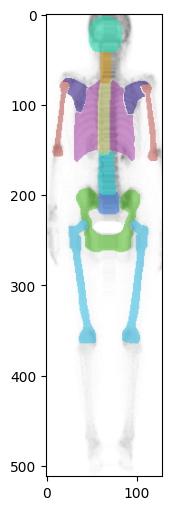

In [ ]:
# Inference Test
checkpoint_path = './work_dirs/tutorial/iter_5000.pth'
model = init_model(cfg_danet_100, checkpoint_path, 'cuda:0')

img = mmcv.imread(IMAGE_TEST)
result = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, img, result)
plt.imshow(mmcv.bgr2rgb(vis_result))

In [ ]:
locale.getpreferredencoding = getpreferredencoding

# Zip the checkpoint to download
!zip -r danet-100-5000-p-32.zip /content/mmsegmentation/work_dirs/tutorial

# Copy the file to own drive
!cp danet-100-5000-p-32.zip '/content/gdrive/MyDrive/Checkpoints'

  adding: content/mmsegmentation/work_dirs/tutorial/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230604_071206/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230604_071206/20230604_071206.json (deflated 18%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230604_071206/20230604_071206.log (deflated 88%)
  adding: content/mmsegmentation/work_dirs/tutorial/danet_r101-d8_4xb4-160k_ade20k-512x512.py (deflated 75%)
  adding: content/mmsegmentation/work_dirs/tutorial/last_checkpoint (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/iter_5000.pth (deflated 7%)
  adding: content/mmsegmentation/work_dirs/tutorial/danet_r50-d8_4xb4-160k_ade20k-512x512.py (deflated 75%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230604_054027/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230604_054027/20230604_054027.log (deflated 85%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230604_054027/20230604_054027.js

In [ ]:
# from google.colab import files
# files.download('danet-100-5000-p-32.zip')

## 100 Variant 16 dam channel

### Training

In [ ]:
cfg = Config.fromfile('configs/danet/danet_r101-d8_4xb4-160k_ade20k-512x512.py')

cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.num_classes = 13
cfg.model.auxiliary_head.num_classes = 13

cfg.model.decode_head.pam_channels = 16

cfg.dataset_type = DATASET_TYPE
cfg.data_root = DATA_ROOT

cfg.train_dataloader.batch_size = BATCH_SIZE

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomResize', scale=(256, 1024), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(256, 1024), keep_ratio=True),
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]

cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
cfg.train_dataloader.dataset.ann_file = 'splits/train.txt'

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.val_dataloader.dataset.ann_file = 'splits/val.txt'

cfg.test_dataloader = cfg.val_dataloader
cfg.test_dataloader.dataset.ann_file = 'splits/test.txt'

cfg.load_from = 'checkpoints/danet_r101-d8_512x512_160k_ade20k_20200616_082348-23bf12f9.pth'

cfg.work_dir = './work_dirs/tutorial'

cfg.train_cfg.max_iters = MAX_ITERATIONS
cfg.train_cfg.val_interval = EVALUATION_INTERVAL
cfg.default_hooks.logger.interval = LOG_CONFIG_INTERVAL
cfg.default_hooks.checkpoint.interval = CHECKPOINT_CONFIG_INTERVAL
cfg['randomness'] = dict(seed=0)

print(f'Config:\n{cfg.pretty_text}')

cfg_danet_100 = cfg

Config:
norm_cfg = dict(type='BN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(512, 512))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(512, 512)),
    pretrained='open-mmlab://resnet101_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='DAHead',
        in_channels=2048,
        in_index=3,
        

In [ ]:
runner_danet_100 = Runner.from_cfg(cfg_danet_100)

06/04 09:24:49 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '


06/04 09:24:51 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/04 09:24:51 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [ ]:
# start training
runner_danet_100.train()

06/04 09:25:53 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
06/04 09:25:53 - mmengine - INFO - load model from: open-mmlab://resnet101_v1c
06/04 09:25:53 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet101_v1c
06/04 09:25:54 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

Loads checkpoint by local backend from path: checkpoints/danet_r101-d8_512x512_160k_ade20k_20200616_082348-23bf12f9.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([150, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([13, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([150]) from checkpoint, the shape in current model is torch.Size([13]).
size mismatch for decode_head.pam.key_project.weight: copying a pa

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


06/04 09:39:05 - mmengine - INFO - per class results:
06/04 09:39:05 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 93.38 | 98.18 |
|  vertebra serviks | 70.84 | 89.98 |
|  vertebra toraks  | 77.85 | 88.36 |
|    tulang rusuk   | 83.55 | 92.54 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 76.83 | 88.19 |
|      humerus      | 75.22 | 93.78 |
| vertebra lumbalis | 77.44 | 87.97 |
| tulang kelangkang | 74.97 | 97.72 |
|      panggul      | 81.84 | 90.02 |
|    tulang paha    | 58.38 | 87.39 |
+-------------------+-------+-------+
06/04 09:39:05 - mmengine - INFO - Iter(val) [7/7]    aAcc: 91.2000  mIoU: 77.0300  mAcc: 91.4100  data_time: 0.0480  time: 0.2040
06/04 09:52:14 - mmengine - INFO - Exp name: danet_r101-d8_4xb4-160k_ade20k-512x512_20230604_092449
06/04 09:52:14 - mmengine - INFO - Iter(train) [1000/5000]  lr: 9.9444e

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-0

### Testing

In [ ]:
# start validating
runner_danet_100.val()

06/04 11:37:36 - mmengine - INFO - per class results:
06/04 11:37:36 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 92.72 | 98.93 |
|  vertebra serviks | 77.01 | 87.96 |
|  vertebra toraks  | 82.04 | 89.04 |
|    tulang rusuk   | 85.01 | 93.68 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 76.76 | 89.97 |
|      humerus      | 76.73 | 89.48 |
| vertebra lumbalis |  78.7 | 85.95 |
| tulang kelangkang | 72.46 | 96.91 |
|      panggul      | 85.14 |  92.2 |
|    tulang paha    |  73.4 | 86.26 |
+-------------------+-------+-------+
06/04 11:37:36 - mmengine - INFO - Iter(val) [7/7]    aAcc: 91.3600  mIoU: 80.0000  mAcc: 91.0400  data_time: 0.0049  time: 0.1559


{'aAcc': 91.36, 'mIoU': 80.0, 'mAcc': 91.04}

In [ ]:
# start testing
runner_danet_100.test()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


06/04 11:37:38 - mmengine - INFO - per class results:
06/04 11:37:38 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 92.53 | 99.02 |
|  vertebra serviks | 78.07 |  90.4 |
|  vertebra toraks  | 81.35 | 90.42 |
|    tulang rusuk   | 88.98 | 93.36 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 81.76 | 91.22 |
|      humerus      | 76.44 | 88.01 |
| vertebra lumbalis | 83.43 | 90.27 |
| tulang kelangkang | 67.24 | 87.74 |
|      panggul      | 80.94 | 89.36 |
|    tulang paha    | 76.04 | 91.15 |
+-------------------+-------+-------+
06/04 11:37:38 - mmengine - INFO - Iter(test) [7/7]    aAcc: 91.8300  mIoU: 80.6800  mAcc: 91.1000  data_time: 0.0278  time: 0.1798


{'aAcc': 91.83, 'mIoU': 80.68, 'mAcc': 91.1}

/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: ./work_dirs/tutorial/iter_5000.pth
06/04 11:37:39 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


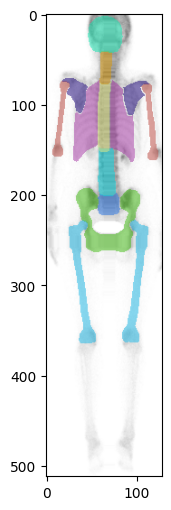

In [ ]:
# Inference Test
checkpoint_path = './work_dirs/tutorial/iter_5000.pth'
model = init_model(cfg_danet_100, checkpoint_path, 'cuda:0')

img = mmcv.imread(IMAGE_TEST)
result = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, img, result)
plt.imshow(mmcv.bgr2rgb(vis_result))

In [ ]:
locale.getpreferredencoding = getpreferredencoding

# Zip the checkpoint to download
!zip -r danet-100-5000-p-16.zip /content/mmsegmentation/work_dirs/tutorial

# Copy the file to own drive
!cp danet-100-5000-p-16.zip '/content/gdrive/MyDrive/Checkpoints'

  adding: content/mmsegmentation/work_dirs/tutorial/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230604_092449/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230604_092449/20230604_092449.json (deflated 21%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230604_092449/20230604_092449.log (deflated 88%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230604_071206/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230604_071206/20230604_071206.json (deflated 18%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230604_071206/20230604_071206.log (deflated 88%)
  adding: content/mmsegmentation/work_dirs/tutorial/danet_r101-d8_4xb4-160k_ade20k-512x512.py (deflated 75%)
  adding: content/mmsegmentation/work_dirs/tutorial/last_checkpoint (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/iter_5000.pth (deflated 7%)
  adding: content/mmsegmentation/work_dirs/tutorial/danet_r50-d8_4xb4-160k_ade20k-512x512.

In [ ]:
# from google.colab import files
# files.download('danet-100-5000-p-32.zip')

# DeepLabv3+ Variant

## 50 Variant

In [ ]:
cfg = Config.fromfile('configs/deeplabv3/deeplabv3_r50-d8_4xb4-160k_ade20k-512x512.py')

cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.num_classes = 13
cfg.model.auxiliary_head.num_classes = 13

cfg.dataset_type = DATASET_TYPE
cfg.data_root = DATA_ROOT

cfg.train_dataloader.batch_size = BATCH_SIZE

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomResize', scale=(256, 1024), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(256, 1024), keep_ratio=True),
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]

cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
cfg.train_dataloader.dataset.ann_file = 'splits/train.txt'

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.val_dataloader.dataset.ann_file = 'splits/val.txt'

cfg.test_dataloader = cfg.val_dataloader
cfg.test_dataloader.dataset.ann_file = 'splits/test.txt'

cfg.load_from = 'checkpoints/deeplabv3plus_r50-d8_512x512_160k_ade20k_20200615_124504-6135c7e0.pth'

cfg.work_dir = './work_dirs/tutorial'

cfg.train_cfg.max_iters = MAX_ITERATIONS
cfg.train_cfg.val_interval = EVALUATION_INTERVAL
cfg.default_hooks.logger.interval = LOG_CONFIG_INTERVAL
cfg.default_hooks.checkpoint.interval = CHECKPOINT_CONFIG_INTERVAL

cfg['randomness'] = dict(seed=0)

print(f'Config:\n{cfg.pretty_text}')

cfg_deeplab_50 = cfg

Config:
norm_cfg = dict(type='BN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(512, 512))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(512, 512)),
    pretrained='open-mmlab://resnet50_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='ASPPHead',
        in_channels=2048,
        in_index=3,
        

In [ ]:
runner_deeplab_50 = Runner.from_cfg(cfg_deeplab_50)

05/06 02:51:38 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ig

05/06 02:51:39 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
05/06 02:51:39 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [ ]:
runner_deeplab_50.train()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


05/06 02:51:40 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
05/06 02:51:41 - mmengine - INFO - load model from: open-mmlab://resnet50_v1c
05/06 02:51:41 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet50_v1c


Downloading: "https://download.openmmlab.com/pretrain/third_party/resnet50_v1c-2cccc1ad.pth" to /root/.cache/torch/hub/checkpoints/resnet50_v1c-2cccc1ad.pth


05/06 02:51:43 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

Loads checkpoint by local backend from path: checkpoints/deeplabv3plus_r50-d8_512x512_160k_ade20k_20200615_124504-6135c7e0.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([150, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([13, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([150]) from checkpoint, the shape in current model is torch.Size([13]).
size mismatch for auxiliary_head.conv_seg.weight: copying a param with shape torch.Size([150, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([13, 256, 1, 1]).
size mismatch for auxiliary_head.conv_seg.bias: copying a param with shape torch.Size([150]) from checkpoint, the shape in current model is torch.Size([13

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


05/06 03:05:07 - mmengine - INFO - per class results:
05/06 03:05:07 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     |  0.0  |  0.0  |
|  vertebra serviks |  0.0  |  0.0  |
|  vertebra toraks  |  71.9 | 77.81 |
|    tulang rusuk   |  81.8 | 93.76 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 73.18 | 89.79 |
|      humerus      | 73.88 | 86.25 |
| vertebra lumbalis | 55.59 | 57.89 |
| tulang kelangkang |  0.0  |  0.0  |
|      panggul      | 76.67 | 88.19 |
|    tulang paha    | 61.87 | 79.78 |
+-------------------+-------+-------+
05/06 03:05:07 - mmengine - INFO - Iter(val) [7/7]    aAcc: 73.6200  mIoU: 49.4900  mAcc: 57.3500  data_time: 0.0343  time: 1.2700
05/06 03:17:27 - mmengine - INFO - Exp name: deeplabv3_r50-d8_4xb4-160k_ade20k-512x512_20230506_025138
05/06 03:17:27 - mmengine - INFO - Iter(train) [1000/5000]  lr: 9.94

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-0

In [ ]:
runner_deeplab_50.val()

05/06 04:56:15 - mmengine - INFO - per class results:
05/06 04:56:15 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 93.64 | 95.93 |
|  vertebra serviks | 78.18 | 88.34 |
|  vertebra toraks  |  82.9 | 92.02 |
|    tulang rusuk   | 84.63 |  92.7 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 76.65 | 89.01 |
|      humerus      | 76.29 |  85.7 |
| vertebra lumbalis | 78.07 | 82.56 |
| tulang kelangkang | 69.57 | 95.97 |
|      panggul      | 83.12 | 87.62 |
|    tulang paha    | 72.26 | 85.08 |
+-------------------+-------+-------+
05/06 04:56:15 - mmengine - INFO - Iter(val) [7/7]    aAcc: 89.5300  mIoU: 79.5300  mAcc: 89.4900  data_time: 0.0049  time: 0.1484


{'aAcc': 89.53, 'mIoU': 79.53, 'mAcc': 89.49}

In [ ]:
runner_deeplab_50.test()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


05/06 04:56:16 - mmengine - INFO - per class results:
05/06 04:56:16 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 92.87 | 95.68 |
|  vertebra serviks | 80.08 | 92.56 |
|  vertebra toraks  | 80.98 | 92.56 |
|    tulang rusuk   | 88.68 | 92.87 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 81.18 | 89.29 |
|      humerus      | 71.31 | 82.36 |
| vertebra lumbalis | 79.94 |  84.8 |
| tulang kelangkang |  62.9 | 85.55 |
|      panggul      | 80.14 |  85.2 |
|    tulang paha    | 69.52 | 88.16 |
+-------------------+-------+-------+
05/06 04:56:16 - mmengine - INFO - Iter(test) [7/7]    aAcc: 89.5400  mIoU: 78.7600  mAcc: 88.9000  data_time: 0.0356  time: 0.1788


{'aAcc': 89.54, 'mIoU': 78.76, 'mAcc': 88.9}

/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: ./work_dirs/tutorial/iter_5000.pth
05/06 04:56:18 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


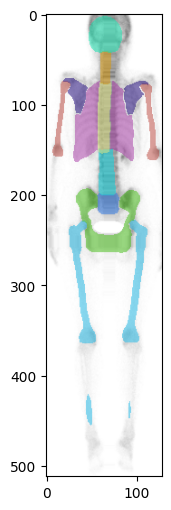

In [ ]:
# Inference Test
checkpoint_path = './work_dirs/tutorial/iter_5000.pth'
model = init_model(cfg_deeplab_50, checkpoint_path, 'cuda:0')

img = mmcv.imread(IMAGE_TEST)
result = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, img, result)
plt.imshow(mmcv.bgr2rgb(vis_result))

In [ ]:
locale.getpreferredencoding = getpreferredencoding

# Zip the checkpoint to download
!zip -r deep-50-5000-p.zip /content/mmsegmentation/work_dirs/tutorial

# Copy the file to own drive
!cp deep-50-5000-p.zip '/content/gdrive/MyDrive/Checkpoints'

  adding: content/mmsegmentation/work_dirs/tutorial/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/last_checkpoint (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/deeplabv3_r50-d8_4xb4-160k_ade20k-512x512.py (deflated 75%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230506_025138/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230506_025138/20230506_025138.log (deflated 85%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230506_025138/20230506_025138.json (deflated 17%)
  adding: content/mmsegmentation/work_dirs/tutorial/iter_2500.pth (deflated 7%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230506_010453/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230506_010453/20230506_010453.log (deflated 86%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230506_010453/20230506_010453.json (deflated 16%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230506_010453/vis_data/ (stored 0

## 100 Variant

In [ ]:
cfg = Config.fromfile('configs/deeplabv3plus/deeplabv3plus_r101-d8_4xb4-160k_ade20k-512x512.py')

cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.num_classes = 13
cfg.model.auxiliary_head.num_classes = 13

cfg.dataset_type = DATASET_TYPE
cfg.data_root = DATA_ROOT

cfg.train_dataloader.batch_size = BATCH_SIZE

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomResize', scale=(256, 1024), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(256, 1024), keep_ratio=True),
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]

cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
cfg.train_dataloader.dataset.ann_file = 'splits/train.txt'

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.val_dataloader.dataset.ann_file = 'splits/val.txt'

cfg.test_dataloader = cfg.val_dataloader
cfg.test_dataloader.dataset.ann_file = 'splits/test.txt'

cfg.load_from = 'checkpoints/deeplabv3plus_r101-d8_512x512_160k_ade20k_20200615_123232-38ed86bb.pth'

cfg.work_dir = './work_dirs/tutorial'

cfg.train_cfg.max_iters = MAX_ITERATIONS
cfg.train_cfg.val_interval = EVALUATION_INTERVAL
cfg.default_hooks.logger.interval = LOG_CONFIG_INTERVAL
cfg.default_hooks.checkpoint.interval = CHECKPOINT_CONFIG_INTERVAL

cfg['randomness'] = dict(seed=0)

print(f'Config:\n{cfg.pretty_text}')

cfg_deeplab_100 = cfg

Config:
norm_cfg = dict(type='BN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(512, 512))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(512, 512)),
    pretrained='open-mmlab://resnet101_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='DepthwiseSeparableASPPHead',
        in_channels=2048,
        

In [ ]:
runner_deeplab_100 = Runner.from_cfg(cfg_deeplab_100)

05/06 23:44:07 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


05/06 23:44:15 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
05/06 23:44:15 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [ ]:
runner_deeplab_100.train()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


05/06 23:44:16 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
05/06 23:44:17 - mmengine - INFO - load model from: open-mmlab://resnet101_v1c
05/06 23:44:17 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet101_v1c


Downloading: "https://download.openmmlab.com/pretrain/third_party/resnet101_v1c-e67eebb6.pth" to /root/.cache/torch/hub/checkpoints/resnet101_v1c-e67eebb6.pth


05/06 23:44:27 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

Loads checkpoint by local backend from path: checkpoints/deeplabv3plus_r101-d8_512x512_160k_ade20k_20200615_123232-38ed86bb.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([150, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([13, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([150]) from checkpoint, the shape in current model is torch.Size([13]).
size mismatch for auxiliary_head.conv_seg.weight: copying a param with shape torch.Size([150, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([13, 256, 1, 1]).
size mismatch for auxiliary_head.conv_seg.bias: copying a param with shape torch.Size([150]) from checkpoint, the shape in current model is torch.Size([1

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


05/06 23:57:22 - mmengine - INFO - per class results:
05/06 23:57:22 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 93.41 |  96.9 |
|  vertebra serviks | 74.73 | 90.49 |
|  vertebra toraks  | 79.09 | 85.36 |
|    tulang rusuk   | 83.62 | 94.33 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 74.36 | 87.06 |
|      humerus      | 76.68 | 89.63 |
| vertebra lumbalis |  80.8 | 88.12 |
| tulang kelangkang | 72.88 | 87.39 |
|      panggul      |  80.9 | 87.96 |
|    tulang paha    | 60.78 | 90.34 |
+-------------------+-------+-------+
05/06 23:57:22 - mmengine - INFO - Iter(val) [7/7]    aAcc: 90.9100  mIoU: 77.7300  mAcc: 89.7600  data_time: 0.0317  time: 0.5887
05/07 00:09:54 - mmengine - INFO - Exp name: deeplabv3plus_r101-d8_4xb4-160k_ade20k-512x512_20230506_234406
05/07 00:09:54 - mmengine - INFO - Iter(train) [1000/5000]  lr:

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-0

In [ ]:
runner_deeplab_100.val()

05/07 01:50:12 - mmengine - INFO - per class results:
05/07 01:50:12 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 92.46 | 98.53 |
|  vertebra serviks | 78.67 | 91.41 |
|  vertebra toraks  | 81.46 | 89.72 |
|    tulang rusuk   | 85.08 | 93.16 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 76.52 | 90.29 |
|      humerus      | 76.48 | 91.07 |
| vertebra lumbalis | 79.87 |  88.2 |
| tulang kelangkang | 68.78 | 96.73 |
|      panggul      | 83.44 | 90.19 |
|    tulang paha    | 71.88 | 87.46 |
+-------------------+-------+-------+
05/07 01:50:12 - mmengine - INFO - Iter(val) [7/7]    aAcc: 91.4700  mIoU: 79.4600  mAcc: 91.6800  data_time: 0.0061  time: 0.1531


{'aAcc': 91.47, 'mIoU': 79.46, 'mAcc': 91.68}

In [ ]:
runner_deeplab_100.test()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


05/07 01:50:14 - mmengine - INFO - per class results:
05/07 01:50:14 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 92.26 | 98.86 |
|  vertebra serviks | 76.55 | 91.19 |
|  vertebra toraks  | 81.25 | 92.49 |
|    tulang rusuk   | 88.55 | 93.02 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 81.15 |  91.2 |
|      humerus      | 73.48 | 88.37 |
| vertebra lumbalis |  83.2 | 92.13 |
| tulang kelangkang | 67.77 | 88.71 |
|      panggul      | 81.26 | 89.13 |
|    tulang paha    | 76.98 | 93.01 |
+-------------------+-------+-------+
05/07 01:50:14 - mmengine - INFO - Iter(test) [7/7]    aAcc: 92.2500  mIoU: 80.2500  mAcc: 91.8100  data_time: 0.0328  time: 0.1796


{'aAcc': 92.25, 'mIoU': 80.25, 'mAcc': 91.81}

/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: ./work_dirs/tutorial/iter_5000.pth
05/07 01:50:16 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


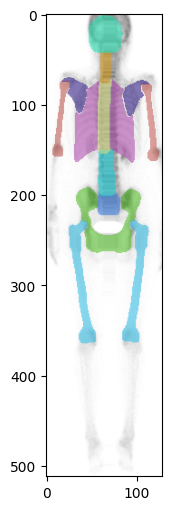

In [ ]:
# Inference Test
checkpoint_path = './work_dirs/tutorial/iter_5000.pth'
model = init_model(cfg_deeplab_100, checkpoint_path, 'cuda:0')

img = mmcv.imread(IMAGE_TEST)
result = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, img, result)
plt.imshow(mmcv.bgr2rgb(vis_result))

In [ ]:
locale.getpreferredencoding = getpreferredencoding

# Zip the checkpoint to download
!zip -r deep-100-5000-p.zip /content/mmsegmentation/work_dirs/tutorial

# # Copy the file to own drive
# !cp deep-100-5000-p.zip '/content/gdrive/MyDrive/Checkpoints'

  adding: content/mmsegmentation/work_dirs/tutorial/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/last_checkpoint (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/deeplabv3plus_r101-d8_4xb4-160k_ade20k-512x512.py (deflated 75%)
  adding: content/mmsegmentation/work_dirs/tutorial/iter_2500.pth (deflated 7%)
  adding: content/mmsegmentation/work_dirs/tutorial/iter_5000.pth (deflated 7%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230506_234406/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230506_234406/20230506_234406.log (deflated 88%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230506_234406/20230506_234406.json (deflated 19%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230506_234406/vis_data/ (stored 0%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230506_234406/vis_data/scalars.json (deflated 68%)
  adding: content/mmsegmentation/work_dirs/tutorial/20230506_234406/vis_data/config.py (deflate

# Checkpoint Model Testing

In [ ]:
# Load files for testing
config_file2 = '/content/mmsegmentation/configs/custom/custom-seg-l-config.py'
checkpoint_file2 = '/content/mmsegmentation/work_dirs/tutorial/latest.pth'

In [ ]:
# build the model
model = init_segmentor(cfg, checkpoint_file2, device='cuda:0')

In [ ]:
# test a single image
img = mmcv.imread('AnteriorTrain/images/2.png')
result = inference_segmentor(model, img)
plt.figure(figsize=(8, 6))
show_result_pyplot(model, img, result, palette)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Zip the checkpoint to download
!zip -r latest_checkpoint.zip /content/mmsegmentation/work_dirs/tutorial/iter_5000.pth

  adding: content/mmsegmentation/work_dirs/tutorial/iter_5000.pth (deflated 8%)


In [ ]:
!cp latest_checkpoint.zip '/content/gdrive/MyDrive/Checkpoints'
# !ls -lt '/content/gdrive/My Drive/downloads/'

NotImplementedError: ignored

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!ls

AnteriorDataset      docs		      PosteriorDataset.zip  setup.cfg
AnteriorDataset.zip  latest_checkpoint.zip    PosteriorFull.zip     setup.py
AnteriorFull.zip     LICENSE		      projects		    tests
checkpoints	     MANIFEST.in	      README.md		    tools
CITATION.cff	     mmseg		      README_zh-CN.md	    work_dirs
configs		     mmsegmentation.egg-info  requirements
demo		     model-index.yml	      requirements.txt
docker		     PosteriorDataset	      resources


In [ ]:
# Zip the checkpoint to download
!zip -r PosteriorFull.zip PosteriorDataset

  adding: PosteriorDataset/ (stored 0%)
  adding: PosteriorDataset/splits/ (stored 0%)
  adding: PosteriorDataset/splits/train.txt (deflated 32%)
  adding: PosteriorDataset/splits/val.txt (stored 0%)
  adding: PosteriorDataset/splits/test.txt (stored 0%)
  adding: PosteriorDataset/labels/ (stored 0%)
  adding: PosteriorDataset/labels/21.txt (deflated 99%)
  adding: PosteriorDataset/labels/63.txt (deflated 99%)
  adding: PosteriorDataset/labels/33.png (deflated 2%)
  adding: PosteriorDataset/labels/31.png (deflated 3%)
  adding: PosteriorDataset/labels/55.txt (deflated 99%)
  adding: PosteriorDataset/labels/23.png (deflated 2%)
  adding: PosteriorDataset/labels/65.png (deflated 2%)
  adding: PosteriorDataset/labels/27.png (deflated 2%)
  adding: PosteriorDataset/labels/9.txt (deflated 99%)
  adding: PosteriorDataset/labels/35.png (deflated 2%)
  adding: PosteriorDataset/labels/59.txt (deflated 99%)
  adding: PosteriorDataset/labels/51.txt (deflated 99%)
  adding: PosteriorDataset/labels

In [ ]:
!python tools/test.py /content/mmsegmentation/configs/custom/configdeep50.py /content/mmsegmentation/work_dirs/tutorial/latest.pth --eval mIoU

# --eval mIoU

# --show-dir configs/custom --opacity 1

In [ ]:
!gdown https://drive.google.com/uc?id=1Djn87b3tqsDwm71YFY9lZljO-UzwskjJ

Downloading...
From (uriginal): https://drive.google.com/uc?id=1Djn87b3tqsDwm71YFY9lZljO-UzwskjJ
From (redirected): https://drive.google.com/uc?id=1Djn87b3tqsDwm71YFY9lZljO-UzwskjJ&confirm=t&uuid=5968f21e-5402-4322-aab0-d89aa4992a26
To: /content/mmsegmentation/iter_5000.pth
100% 54.4M/54.4M [00:01<00:00, 32.5MB/s]


In [ ]:
!python tools/test.py /content/testing/segmenter_vit-t_mask_8xb1-160k_ade20k-512x512.py /content/mmsegmentation/iter_5000.pth --show-dir /content/result --show

# --eval mIoU

# --show-dir configs/custom --opacity 1

05/08 05:24:32 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

In [ ]:
model2 = init_model('/content/testing/segmenter_vit-t_mask_8xb1-160k_ade20k-512x512.py', '/content/mmsegmentation/iter_5000.pth', 'cuda:0')

Loads checkpoint by local backend from path: /content/mmsegmentation/iter_5000.pth


/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


# Inference

## Download Desired Checkpoint & Configs

In [ ]:
# Change Dataset
!rm -rf /content/mmsegmentation/mmseg/datasets/__init__.py

!gdown https://drive.google.com/uc?id=1lUOgAU7VZGgm-Ku9CFw0OTmbv68VpVCI -O /content/mmsegmentation/mmseg/datasets/__init__.py
!gdown https://drive.google.com/uc?id=1juXmLyjTCzwobO4ytPp3PEQsWqlGPHKO -O /content/mmsegmentation/mmseg/datasets/anteriordatasetfull.py
!gdown https://drive.google.com/uc?id=16--3RCKUI_DSQFhwGR8vL9h5kbBT7XX0 -O /content/mmsegmentation/mmseg/datasets/posteriordatasetfull.py

!pip install -e .

Downloading...
From (uriginal): https://drive.google.com/uc?id=1lUOgAU7VZGgm-Ku9CFw0OTmbv68VpVCI
From (redirected): https://drive.google.com/uc?id=1lUOgAU7VZGgm-Ku9CFw0OTmbv68VpVCI&confirm=t&uuid=31552a42-1fe6-41ee-965d-af8c9ffce78b
To: /content/mmsegmentation/mmseg/datasets/__init__.py
100% 2.88k/2.88k [00:00<00:00, 20.8MB/s]
Downloading...
From (uriginal): https://drive.google.com/uc?id=1juXmLyjTCzwobO4ytPp3PEQsWqlGPHKO
From (redirected): https://drive.google.com/uc?id=1juXmLyjTCzwobO4ytPp3PEQsWqlGPHKO&confirm=t&uuid=63f8ea20-d480-4b40-b037-1e53f05abaed
To: /content/mmsegmentation/mmseg/datasets/anteriordatasetfull.py
100% 1.57k/1.57k [00:00<00:00, 10.7MB/s]
Downloading...
From (uriginal): https://drive.google.com/uc?id=16--3RCKUI_DSQFhwGR8vL9h5kbBT7XX0
From (redirected): https://drive.google.com/uc?id=16--3RCKUI_DSQFhwGR8vL9h5kbBT7XX0&confirm=t&uuid=271602c5-004b-4736-b459-b3a17fa8d5c4
To: /content/mmsegmentation/mmseg/datasets/posteriordatasetfull.py
100% 1.57k/1.57k [00:00<00:00, 

In [ ]:
# DANet Anterior r50
!gdown https://drive.google.com/uc?id=1F7D6fWHQtSSpWY5FWo2j4LeIFIvfvxo5 -O /content/mmsegmentation/checkpoints/danet-50-5000-a-checkpoint.pth
!gdown https://drive.google.com/uc?id=1pxC98R9VQww30qvIpFbr_0BH9_Fst-W5 -O /content/mmsegmentation/checkpoints/danet-50-5000-a-config.py

In [ ]:
# Segmenter Big - Anterior
!gdown https://drive.google.com/uc?id=1os7O4jDR55C5qnqW97ntOQxy5Czron-0 -O /content/mmsegmentation/checkpoints/seg-b-5000-a-checkpoint.pth
!gdown https://drive.google.com/uc?id=1ADMW__baeySituRK3HcE3d2OipoiLquN -O /content/mmsegmentation/checkpoints/seg-b-5000-a-config.py

Downloading...
From (uriginal): https://drive.google.com/uc?id=1os7O4jDR55C5qnqW97ntOQxy5Czron-0
From (redirected): https://drive.google.com/uc?id=1os7O4jDR55C5qnqW97ntOQxy5Czron-0&confirm=t&uuid=b5edc7ba-ef5b-42a3-a9a1-33df9aa9b4d4
To: /content/mmsegmentation/checkpoints/seg-b-5000-a-checkpoint.pth
100% 821M/821M [00:09<00:00, 82.2MB/s]
Downloading...
From (uriginal): https://drive.google.com/uc?id=1ADMW__baeySituRK3HcE3d2OipoiLquN
From (redirected): https://drive.google.com/uc?id=1ADMW__baeySituRK3HcE3d2OipoiLquN&confirm=t&uuid=a9e61b49-9017-4d3e-b0eb-cb2bb66a308a
To: /content/mmsegmentation/checkpoints/seg-b-5000-a-config.py
100% 7.12k/7.12k [00:00<00:00, 30.4MB/s]


In [ ]:
# Deeplabv3+ r101 - Anterior
!gdown https://drive.google.com/uc?id=1UBhiiD82UmBiC3pFdHGOUcCt4ytkHquK -O /content/mmsegmentation/checkpoints/deepv3-100-5000-a-checkpoint.pth
!gdown https://drive.google.com/uc?id=1CVKq--oCoppy7be2WD7FoR9ydnV8UgLB -O /content/mmsegmentation/checkpoints/deepv3-100-5000-a-config.py

Downloading...
From (uriginal): https://drive.google.com/uc?id=1UBhiiD82UmBiC3pFdHGOUcCt4ytkHquK
From (redirected): https://drive.google.com/uc?id=1UBhiiD82UmBiC3pFdHGOUcCt4ytkHquK&confirm=t&uuid=6a575466-a9f2-43fb-bffe-43a879f756f5
To: /content/mmsegmentation/checkpoints/deepv3-100-5000-a-checkpoint.pth
100% 502M/502M [00:08<00:00, 56.3MB/s]
Downloading...
From (uriginal): https://drive.google.com/uc?id=1CVKq--oCoppy7be2WD7FoR9ydnV8UgLB
From (redirected): https://drive.google.com/uc?id=1CVKq--oCoppy7be2WD7FoR9ydnV8UgLB&confirm=t&uuid=ae4b6f11-7f67-41ef-9bef-f9da31a3a876
To: /content/mmsegmentation/checkpoints/deepv3-100-5000-a-config.py
100% 7.29k/7.29k [00:00<00:00, 30.7MB/s]


In [ ]:
# DANet r101 - Anterior
!gdown https://drive.google.com/uc?id=1dxjbg8Ebx_BHOKWQNdOKijPIHfL3q4hQ -O /content/mmsegmentation/checkpoints/danet-100-5000-a-checkpoint.pth
!gdown https://drive.google.com/uc?id=1ncuExeRdbeMke5-DuVyHj3rotzkcYOCS -O /content/mmsegmentation/checkpoints/danet-100-5000-a-config.py

Downloading...
From (uriginal): https://drive.google.com/uc?id=1dxjbg8Ebx_BHOKWQNdOKijPIHfL3q4hQ
From (redirected): https://drive.google.com/uc?id=1dxjbg8Ebx_BHOKWQNdOKijPIHfL3q4hQ&confirm=t&uuid=0d6cc9a4-884c-486c-a29f-492ba6ac014d
To: /content/mmsegmentation/checkpoints/danet-100-5000-a-checkpoint.pth
100% 552M/552M [00:04<00:00, 128MB/s]
Downloading...
From (uriginal): https://drive.google.com/uc?id=1ncuExeRdbeMke5-DuVyHj3rotzkcYOCS
From (redirected): https://drive.google.com/uc?id=1ncuExeRdbeMke5-DuVyHj3rotzkcYOCS&confirm=t&uuid=80bc41fd-0bde-4a56-8c44-0b981e2aa2db
To: /content/mmsegmentation/checkpoints/danet-100-5000-a-config.py
100% 7.20k/7.20k [00:00<00:00, 27.5MB/s]


In [ ]:
# Segmenter Big - Posterior
!gdown https://drive.google.com/uc?id=1GDhgI9H2xctWgGpPB6sVPt2VVDqZ3Gvm -O /content/mmsegmentation/checkpoints/seg-b-5000-p-checkpoint.pth
!gdown https://drive.google.com/uc?id=18uGl0UnGmzULoPJYzG_qElxxHCKs5_oE -O /content/mmsegmentation/checkpoints/seg-b-5000-p-config.py

Downloading...
From (uriginal): https://drive.google.com/uc?id=1GDhgI9H2xctWgGpPB6sVPt2VVDqZ3Gvm
From (redirected): https://drive.google.com/uc?id=1GDhgI9H2xctWgGpPB6sVPt2VVDqZ3Gvm&confirm=t&uuid=2a447ff7-f5a9-4475-836d-c50fe725471b
To: /content/mmsegmentation/checkpoints/seg-b-5000-p-checkpoint.pth
100% 821M/821M [00:08<00:00, 102MB/s] 
Downloading...
From (uriginal): https://drive.google.com/uc?id=18uGl0UnGmzULoPJYzG_qElxxHCKs5_oE
From (redirected): https://drive.google.com/uc?id=18uGl0UnGmzULoPJYzG_qElxxHCKs5_oE&confirm=t&uuid=439496d3-5223-49d4-a1a2-30bd867f32c4
To: /content/mmsegmentation/checkpoints/seg-b-5000-p-config.py
100% 7.13k/7.13k [00:00<00:00, 31.4MB/s]


In [ ]:
# Deeplabv3+ r101 - Posterior
!gdown https://drive.google.com/uc?id=11g1Pv3aticnm0_vt0FdSN-rysQrRtV34 -O /content/mmsegmentation/checkpoints/deepv3-50-5000-p-checkpoint.pth
!gdown https://drive.google.com/uc?id=14N-o-k2yOI0ZSaXuFqnnLn28eQ0XHoDr -O /content/mmsegmentation/checkpoints/deepv3-50-5000-p-config.py

Downloading...
From (uriginal): https://drive.google.com/uc?id=11g1Pv3aticnm0_vt0FdSN-rysQrRtV34
From (redirected): https://drive.google.com/uc?id=11g1Pv3aticnm0_vt0FdSN-rysQrRtV34&confirm=t&uuid=64989738-9e36-48d8-9c30-3f153ffc914e
To: /content/mmsegmentation/checkpoints/deepv3-50-5000-p-checkpoint.pth
100% 546M/546M [00:08<00:00, 66.0MB/s]
Downloading...
From (uriginal): https://drive.google.com/uc?id=14N-o-k2yOI0ZSaXuFqnnLn28eQ0XHoDr
From (redirected): https://drive.google.com/uc?id=14N-o-k2yOI0ZSaXuFqnnLn28eQ0XHoDr&confirm=t&uuid=b245704a-f598-4a03-8a3f-74a27eb19790
To: /content/mmsegmentation/checkpoints/deepv3-50-5000-p-config.py
100% 7.22k/7.22k [00:00<00:00, 34.2MB/s]


In [ ]:
# DANet r101 - Posterior
!gdown https://drive.google.com/uc?id=18OYdhNkN0lLwlyDYM1Yhb78W8O4AnCUm -O /content/mmsegmentation/checkpoints/danet-100-5000-p-checkpoint.pth
!gdown https://drive.google.com/uc?id=1ZMlGMHebYzcljMfEnjoJeWnsA-k68Hkb -O /content/mmsegmentation/checkpoints/danet-100-5000-p-config.py

Downloading...
From (uriginal): https://drive.google.com/uc?id=18OYdhNkN0lLwlyDYM1Yhb78W8O4AnCUm
From (redirected): https://drive.google.com/uc?id=18OYdhNkN0lLwlyDYM1Yhb78W8O4AnCUm&confirm=t&uuid=8b47ca86-0dd1-47f1-8b72-0466ee0fee82
To: /content/mmsegmentation/checkpoints/danet-100-5000-p-checkpoint.pth
100% 552M/552M [00:08<00:00, 64.7MB/s]
Downloading...
From (uriginal): https://drive.google.com/uc?id=1ZMlGMHebYzcljMfEnjoJeWnsA-k68Hkb
From (redirected): https://drive.google.com/uc?id=1ZMlGMHebYzcljMfEnjoJeWnsA-k68Hkb&confirm=t&uuid=cf4eabf2-b866-42c9-9ff5-569250c4f919
To: /content/mmsegmentation/checkpoints/danet-100-5000-p-config.py
100% 7.21k/7.21k [00:00<00:00, 40.0MB/s]


In [ ]:
# DANet Anterior r101-32
!gdown https://drive.google.com/uc?id=1plcYRIV7bqxutfIh-2lfGiaPVTIez_ZN -O /content/mmsegmentation/checkpoints/danet-100-5000-a-32-checkpoint.pth
!gdown https://drive.google.com/uc?id=1-LxFe7007xgnIdxl3faA0oB7l6hqQuue -O /content/mmsegmentation/checkpoints/danet-100-5000-a-32-config.py

Downloading...
From (uriginal): https://drive.google.com/uc?id=1plcYRIV7bqxutfIh-2lfGiaPVTIez_ZN
From (redirected): https://drive.google.com/uc?id=1plcYRIV7bqxutfIh-2lfGiaPVTIez_ZN&confirm=t&uuid=2cdd0c61-d7ac-454b-bae8-3f93a4f947e8
To: /content/mmsegmentation/checkpoints/danet-100-5000-a-32-checkpoint.pth
100% 552M/552M [00:08<00:00, 65.5MB/s]
Downloading...
From (uriginal): https://drive.google.com/uc?id=1-LxFe7007xgnIdxl3faA0oB7l6hqQuue
From (redirected): https://drive.google.com/uc?id=1-LxFe7007xgnIdxl3faA0oB7l6hqQuue&confirm=t&uuid=8edbda83-de7a-4612-8dda-97c3cf1c2223
To: /content/mmsegmentation/checkpoints/danet-100-5000-a-32-config.py
100% 7.20k/7.20k [00:00<00:00, 34.9MB/s]


## Inference API


In [ ]:
# Anterior
images = ['/content/mmsegmentation/AnteriorDatasetFull/images/2.png',
          '/content/mmsegmentation/AnteriorDatasetFull/images/18.png',
          '/content/mmsegmentation/AnteriorDatasetFull/images/24.png',
          '/content/mmsegmentation/AnteriorDatasetFull/images/26.png',
          '/content/mmsegmentation/AnteriorDatasetFull/images/34.png',
          '/content/mmsegmentation/AnteriorDatasetFull/images/36.png',
          '/content/mmsegmentation/AnteriorDatasetFull/images/42.png']

# # Posterior
# images = ['/content/mmsegmentation/PosteriorDatasetFull/images/1.png',
#           '/content/mmsegmentation/PosteriorDatasetFull/images/3.png',
#           '/content/mmsegmentation/PosteriorDatasetFull/images/5.png',
#           '/content/mmsegmentation/PosteriorDatasetFull/images/39.png',
#           '/content/mmsegmentation/PosteriorDatasetFull/images/49.png',
#           '/content/mmsegmentation/PosteriorDatasetFull/images/57.png',
#           '/content/mmsegmentation/PosteriorDatasetFull/images/69.png']

In [ ]:
# # Danet r50 Anterior
# inferencer = MMSegInferencer(model='/content/mmsegmentation/checkpoints/danet-50-5000-a-config.py', weights='/content/mmsegmentation/checkpoints/danet-50-5000-a-checkpoint.pth')

# # Segmenter Big Anterior
# inferencer = MMSegInferencer(model='/content/mmsegmentation/checkpoints/seg-b-5000-a-config.py', weights='/content/mmsegmentation/checkpoints/seg-b-5000-a-checkpoint.pth')

# # DeepLabv3+ r101 Anterior
# inferencer = MMSegInferencer(model='/content/mmsegmentation/checkpoints/deepv3-100-5000-a-config.py', weights='/content/mmsegmentation/checkpoints/deepv3-100-5000-a-checkpoint.pth')

# # DANet r101 Anterior
# inferencer = MMSegInferencer(model='/content/mmsegmentation/checkpoints/danet-100-5000-a-config.py', weights='/content/mmsegmentation/checkpoints/danet-100-5000-a-checkpoint.pth')

# # Segmenter Big Posterior
# inferencer = MMSegInferencer(model='/content/mmsegmentation/checkpoints/seg-b-5000-p-config.py', weights='/content/mmsegmentation/checkpoints/seg-b-5000-p-checkpoint.pth')

# # DeepLabv3+ r50 Posterior
# inferencer = MMSegInferencer(model='/content/mmsegmentation/checkpoints/deepv3-50-5000-p-config.py', weights='/content/mmsegmentation/checkpoints/deepv3-50-5000-p-checkpoint.pth')

# # DANet r101 Posterior
# inferencer = MMSegInferencer(model='/content/mmsegmentation/checkpoints/danet-100-5000-p-config.py', weights='/content/mmsegmentation/checkpoints/danet-100-5000-p-checkpoint.pth')

# DANet r50 - 32 Anterior
inferencer = MMSegInferencer(model='/content/mmsegmentation/checkpoints/danet-100-5000-a-32-config.py', weights='/content/mmsegmentation/checkpoints/danet-100-5000-a-32-checkpoint.pth')

Loads checkpoint by local backend from path: /content/mmsegmentation/checkpoints/danet-100-5000-a-32-checkpoint.pth


/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


06/04 13:21:33 - mmengine - WARNING - Failed to search registry with scope "mmseg" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmseg" is a correct scope, or whether the registry is initialized.
06/04 13:21:33 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


In [ ]:
inferencer(images, out_dir='outputs', img_out_dir='vis', pred_out_dir='pred', opacity=0.5)

In [ ]:
!rm -rf /content/mmsegmentation/hasil.zip
!zip -r hasil.zip /content/mmsegmentation/outputs/pred

  adding: content/mmsegmentation/outputs/pred/ (stored 0%)
  adding: content/mmsegmentation/outputs/pred/00000002_pred.png (deflated 4%)
  adding: content/mmsegmentation/outputs/pred/00000005_pred.png (deflated 3%)
  adding: content/mmsegmentation/outputs/pred/00000004_pred.png (deflated 4%)
  adding: content/mmsegmentation/outputs/pred/00000000_pred.png (deflated 3%)
  adding: content/mmsegmentation/outputs/pred/00000001_pred.png (deflated 3%)
  adding: content/mmsegmentation/outputs/pred/00000006_pred.png (deflated 3%)
  adding: content/mmsegmentation/outputs/pred/00000003_pred.png (deflated 3%)


## Inference Tools

/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: /content/mmsegmentation/checkpoints/danet-50-5000-a-checkpoint.pth


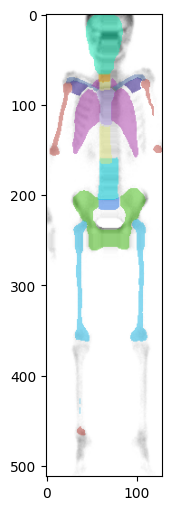

In [ ]:
# Inference Test
model = init_model('/content/mmsegmentation/checkpoints/danet-50-5000-a-config.py', '/content/mmsegmentation/checkpoints/danet-50-5000-a-checkpoint.pth', 'cuda:0')

img = mmcv.imread(IMAGE_TEST)
result = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, img, result)
plt.imshow(mmcv.bgr2rgb(vis_result))

## Inference Real

In [ ]:
!unzip /content/output.zip -d /content

Archive:  /content/output.zip
   creating: /content/output/
  inflating: /content/output/1.png   
  inflating: /content/output/3.png   
  inflating: /content/output/39.png  
  inflating: /content/output/49.png  
  inflating: /content/output/5.png   
  inflating: /content/output/57.png  
  inflating: /content/output/69.png  


In [ ]:
# Anterior: 2, 18, 24, 26, 34, 36, 42
# Posterior: 1, 3, 5, 39, 49, 57, 69

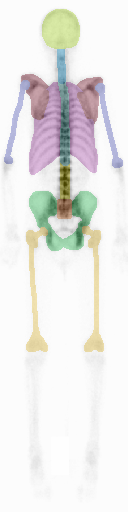

In [ ]:
# # Anterior
# raw_image = Image.open('/content/mmsegmentation/AnteriorDatasetFull/images/42.png')

# Posterior
raw_image = Image.open('/content/mmsegmentation/PosteriorDatasetFull/images/49.png')

segmentation_result = Image.open('/content/output/49.png')

mask = Image.new("L", segmentation_result.size, 80)
final = Image.composite(segmentation_result, raw_image, mask)
final

In [ ]:
!rm -rf /content/output
!rm -rf /content/output.zip

## Test

In [ ]:
np.unique(mmcv.imread('/content/mmsegmentation/outputs/pred/00000000_pred.png'))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=uint8)

In [ ]:
mmcv.imread('/content/mmsegmentation/outputs/pred/00000000_pred.png')

array([[[12, 12, 12],
        [12, 12, 12],
        [12, 12, 12],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[12, 12, 12],
        [12, 12, 12],
        [12, 12, 12],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[12, 12, 12],
        [12, 12, 12],
        [12, 12, 12],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       ...,

       [[12, 12, 12],
        [12, 12, 12],
        [12, 12, 12],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[12, 12, 12],
        [12, 12, 12],
        [12, 12, 12],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]],

       [[12, 12, 12],
        [12, 12, 12],
        [12, 12, 12],
        ...,
        [12, 12, 12],
        [12, 12, 12],
        [12, 12, 12]]], dtype=uint8)

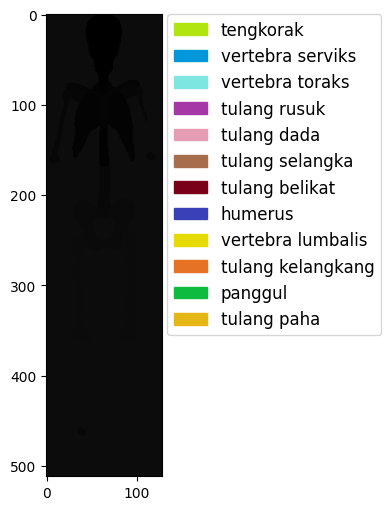

In [ ]:
img = Image.open('/content/mmsegmentation/outputs/pred/00000000_pred.png')
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color
patches = [mpatches.Patch(color=np.array(palette[i])/255.,
                          label=classes[i]) for i in range(12)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
           fontsize='large')

plt.show()

# Individual Image Test

## Anterior

In [ ]:
# Test Image Control
ANN_FILE = 'splits/test34.txt'

### Seg-B

In [ ]:
# Seg-B Anterior
cfg = Config.fromfile('/content/mmsegmentation/checkpoints/seg-b-5000-a-config.py')
cfg.load_from = '/content/mmsegmentation/checkpoints/seg-b-5000-a-checkpoint.pth'
cfg.test_dataloader.dataset.ann_file = ANN_FILE
cfg_test_seg_b_a = cfg

In [ ]:
runner_test_seg_b_a = Runner.from_cfg(cfg_test_seg_b_a)

06/05 01:35:05 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 271, in _feed
    queue_sem.release()
ValueError: semaphore or lock released too many times
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239

06/05 01:35:12 - mmengine - INFO - Config:
checkpoint = 'https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segmenter/vit_base_p16_384_20220308-96dfe169.pth'
backbone_norm_cfg = dict(type='LN', eps=1e-06, requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[127.5, 127.5, 127.5],
    std=[127.5, 127.5, 127.5],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(512, 512))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[127.5, 127.5, 127.5],
        std=[127.5, 127.5, 127.5],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(512, 512)),
    pretrained=
    'https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segmenter/vit_base_p16_384_20220308-96dfe169.pth',
    backbone=dict(
        type='VisionTransformer',
        img_size=(512, 512),
        patch_size=16,
        in_channels=3,
        embed_dims=768,
        num_

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/content/mmsegmentation/mmseg/models/backbones/vit.py:218: UserWarning: DeprecationWarning: pretrained is deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is deprecated, '
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=Tr

06/05 01:35:15 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/05 01:35:15 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [ ]:
runner_test_seg_b_a.test()

06/05 01:35:17 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 271, in _feed
    queue_sem.release()
ValueError: semaphore or lock released too many times
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239

Loads checkpoint by local backend from path: /content/mmsegmentation/checkpoints/seg-b-5000-a-checkpoint.pth
06/05 01:35:24 - mmengine - INFO - Load checkpoint from /content/mmsegmentation/checkpoints/seg-b-5000-a-checkpoint.pth


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


06/05 01:35:24 - mmengine - INFO - per class results:
06/05 01:35:24 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 93.52 | 98.32 |
|  vertebra serviks | 48.42 | 95.83 |
|  vertebra toraks  | 57.61 |  91.6 |
|    tulang rusuk   | 73.63 | 94.09 |
|    tulang dada    | 62.35 | 70.47 |
|  tulang selangka  | 53.91 | 70.06 |
|   tulang belikat  | 52.22 | 80.51 |
|      humerus      |  29.6 | 30.71 |
| vertebra lumbalis | 75.24 | 96.39 |
| tulang kelangkang | 37.37 | 64.81 |
|      panggul      | 82.71 | 89.59 |
|    tulang paha    | 57.73 | 66.76 |
+-------------------+-------+-------+
06/05 01:35:24 - mmengine - INFO - Iter(test) [1/1]    aAcc: 81.7500  mIoU: 60.3600  mAcc: 79.1000  data_time: 0.2105  time: 0.4316


{'aAcc': 81.75, 'mIoU': 60.36, 'mAcc': 79.1}

### Deep-101

In [ ]:
# Deep-101 Anterior
cfg = Config.fromfile('/content/mmsegmentation/checkpoints/deepv3-100-5000-a-config.py')
cfg.load_from = '/content/mmsegmentation/checkpoints/deepv3-100-5000-a-checkpoint.pth'

cfg.test_dataloader.dataset.ann_file = ANN_FILE

cfg_test_deep_101_a = cfg

In [ ]:
runner_test_deep_101_a = Runner.from_cfg(cfg_test_deep_101_a)

06/05 01:35:24 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ig

06/05 01:35:27 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/05 01:35:27 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [ ]:
runner_test_deep_101_a.test()

06/05 01:35:28 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
Loads checkpoint by local backend from path: /content/mmsegmentation/checkpoints/deepv3-100-5000-a-checkpoint.pth
06/05 01:35:29 - mmengine - INFO - Load checkpoint from /content/mmsegmentation/checkpoints/deepv3-100-5000-a-checkpoint.pth


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


06/05 01:35:29 - mmengine - INFO - per class results:
06/05 01:35:29 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 94.37 | 98.47 |
|  vertebra serviks | 36.89 | 79.17 |
|  vertebra toraks  | 69.63 | 88.89 |
|    tulang rusuk   | 79.74 | 92.57 |
|    tulang dada    | 86.04 | 88.84 |
|  tulang selangka  | 78.91 | 89.83 |
|   tulang belikat  | 72.55 |  84.3 |
|      humerus      | 74.82 | 91.27 |
| vertebra lumbalis | 76.56 | 88.55 |
| tulang kelangkang |  55.3 | 74.07 |
|      panggul      | 87.38 | 94.87 |
|    tulang paha    | 80.78 | 86.97 |
+-------------------+-------+-------+
06/05 01:35:29 - mmengine - INFO - Iter(test) [1/1]    aAcc: 91.7600  mIoU: 74.4100  mAcc: 88.1500  data_time: 0.2748  time: 0.4723


{'aAcc': 91.76, 'mIoU': 74.41, 'mAcc': 88.15}

### DANet-100-32

In [ ]:
# DANet-100-32 Anterior
cfg = Config.fromfile('/content/mmsegmentation/checkpoints/danet-100-5000-a-32-config.py')
cfg.load_from = '/content/mmsegmentation/checkpoints/danet-100-5000-a-32-checkpoint.pth'
cfg.test_dataloader.dataset.ann_file = ANN_FILE
cfg_test_danet_100_32_a = cfg

In [ ]:
runner_test_danet_100_32_a = Runner.from_cfg(cfg_test_danet_100_32_a)

06/05 01:35:29 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 271, in _feed
    queue_sem.release()
ValueError: semaphore or lock released too many times
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239

06/05 01:35:35 - mmengine - INFO - Config:
norm_cfg = dict(type='BN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(512, 512))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(512, 512)),
    pretrained='open-mmlab://resnet101_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=101,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='DAHead',
        in_channels

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ig

06/05 01:35:36 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/05 01:35:36 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [ ]:
runner_test_danet_100_32_a.test()

06/05 01:35:37 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
Loads checkpoint by local backend from path: /content/mmsegmentation/checkpoints/danet-100-5000-a-32-checkpoint.pth
06/05 01:35:38 - mmengine - INFO - Load checkpoint from /content/mmsegmentation/checkpoints/danet-100-5000-a-32-checkpoint.pth


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


06/05 01:35:38 - mmengine - INFO - per class results:
06/05 01:35:38 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 94.93 | 97.97 |
|  vertebra serviks | 49.46 | 95.83 |
|  vertebra toraks  | 70.74 | 90.12 |
|    tulang rusuk   | 81.02 |  93.6 |
|    tulang dada    | 80.71 | 84.65 |
|  tulang selangka  | 76.61 | 84.18 |
|   tulang belikat  | 72.51 | 84.81 |
|      humerus      | 63.51 | 68.64 |
| vertebra lumbalis |  78.4 | 96.18 |
| tulang kelangkang | 66.51 | 87.04 |
|      panggul      |  84.6 | 93.41 |
|    tulang paha    | 83.39 | 89.49 |
+-------------------+-------+-------+
06/05 01:35:38 - mmengine - INFO - Iter(test) [1/1]    aAcc: 90.6100  mIoU: 75.2000  mAcc: 88.8300  data_time: 0.2099  time: 0.4359


{'aAcc': 90.61, 'mIoU': 75.2, 'mAcc': 88.83}

## Posterior

In [ ]:
# Test Image Control
ANN_FILE = 'splits/test39.txt'

### Seg-B

In [ ]:
# Seg-B Anterior
cfg = Config.fromfile('/content/mmsegmentation/checkpoints/seg-b-5000-p-config.py')
cfg.load_from = '/content/mmsegmentation/checkpoints/seg-b-5000-p-checkpoint.pth'
cfg.test_dataloader.dataset.ann_file = ANN_FILE
cfg_test_seg_b_p = cfg

In [ ]:
runner_test_seg_b_p = Runner.from_cfg(cfg_test_seg_b_p)

06/05 02:19:06 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

Exception in thread Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 177, in close
    reader_close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    reader_close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor

06/05 02:19:13 - mmengine - INFO - Config:
checkpoint = 'https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segmenter/vit_base_p16_384_20220308-96dfe169.pth'
backbone_norm_cfg = dict(type='LN', eps=1e-06, requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[127.5, 127.5, 127.5],
    std=[127.5, 127.5, 127.5],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(512, 512))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[127.5, 127.5, 127.5],
        std=[127.5, 127.5, 127.5],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(512, 512)),
    pretrained=
    'https://download.openmmlab.com/mmsegmentation/v0.5/pretrain/segmenter/vit_base_p16_384_20220308-96dfe169.pth',
    backbone=dict(
        type='VisionTransformer',
        img_size=(512, 512),
        patch_size=16,
        in_channels=3,
        embed_dims=768,
        num_

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/content/mmsegmentation/mmseg/models/backbones/vit.py:218: UserWarning: DeprecationWarning: pretrained is deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is deprecated, '
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=Tr

06/05 02:19:15 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/05 02:19:15 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [ ]:
runner_test_seg_b_p.test()

06/05 02:19:17 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 271, in _feed
    queue_sem.release()
ValueError: semaphore or lock released too many times
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239

Loads checkpoint by local backend from path: /content/mmsegmentation/checkpoints/seg-b-5000-p-checkpoint.pth
06/05 02:19:25 - mmengine - INFO - Load checkpoint from /content/mmsegmentation/checkpoints/seg-b-5000-p-checkpoint.pth


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


06/05 02:19:26 - mmengine - INFO - per class results:
06/05 02:19:26 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 91.85 | 95.79 |
|  vertebra serviks | 65.31 | 76.98 |
|  vertebra toraks  | 61.71 |  73.0 |
|    tulang rusuk   | 82.21 | 91.92 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 76.62 | 81.04 |
|      humerus      | 69.75 | 90.18 |
| vertebra lumbalis | 68.68 | 69.12 |
| tulang kelangkang | 53.82 | 63.79 |
|      panggul      | 72.77 |  92.2 |
|    tulang paha    | 44.07 | 49.98 |
+-------------------+-------+-------+
06/05 02:19:26 - mmengine - INFO - Iter(test) [1/1]    aAcc: 81.4300  mIoU: 68.6800  mAcc: 78.4000  data_time: 0.3376  time: 0.5916


{'aAcc': 81.43, 'mIoU': 68.68, 'mAcc': 78.4}

### Deep-50

In [ ]:
# Deep-50
cfg = Config.fromfile('/content/mmsegmentation/checkpoints/deepv3-50-5000-p-config.py')
cfg.load_from = '/content/mmsegmentation/checkpoints/deepv3-50-5000-p-checkpoint.pth'

cfg.test_dataloader.dataset.ann_file = ANN_FILE

cfg_test_deep_50_p = cfg

In [ ]:
runner_test_deep_50_p = Runner.from_cfg(cfg_test_deep_50_p)

06/05 02:19:26 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ig

06/05 02:19:29 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/05 02:19:29 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [ ]:
runner_test_deep_50_p.test()

06/05 02:19:29 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
Loads checkpoint by local backend from path: /content/mmsegmentation/checkpoints/deepv3-50-5000-p-checkpoint.pth
06/05 02:19:32 - mmengine - INFO - Load checkpoint from /content/mmsegmentation/checkpoints/deepv3-50-5000-p-checkpoint.pth


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


06/05 02:19:32 - mmengine - INFO - per class results:
06/05 02:19:32 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 95.03 | 95.19 |
|  vertebra serviks | 82.44 | 100.0 |
|  vertebra toraks  | 65.89 | 83.97 |
|    tulang rusuk   | 87.45 | 92.19 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 87.05 | 95.88 |
|      humerus      | 77.56 | 89.91 |
| vertebra lumbalis | 75.47 | 75.63 |
| tulang kelangkang | 67.37 | 82.76 |
|      panggul      | 85.25 | 90.79 |
|    tulang paha    | 66.54 | 83.67 |
+-------------------+-------+-------+
06/05 02:19:32 - mmengine - INFO - Iter(test) [1/1]    aAcc: 89.9500  mIoU: 79.0000  mAcc: 89.0000  data_time: 0.2263  time: 0.4384


{'aAcc': 89.95, 'mIoU': 79.0, 'mAcc': 89.0}

### DANet-100-64

In [ ]:
# DANet-100-32 Anterior
cfg = Config.fromfile('/content/mmsegmentation/checkpoints/danet-100-5000-p-config.py')
cfg.load_from = '/content/mmsegmentation/checkpoints/danet-100-5000-p-checkpoint.pth'
cfg.test_dataloader.dataset.ann_file = ANN_FILE
cfg_test_danet_100_64_p = cfg

In [ ]:
runner_test_danet_100_64_p = Runner.from_cfg(cfg_test_danet_100_64_p)

06/05 02:19:32 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/content/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ig

06/05 02:19:40 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/05 02:19:40 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [ ]:
runner_test_danet_100_64_p.test()

06/05 02:19:41 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
Loads checkpoint by local backend from path: /content/mmsegmentation/checkpoints/danet-100-5000-p-checkpoint.pth
06/05 02:19:44 - mmengine - INFO - Load checkpoint from /content/mmsegmentation/checkpoints/danet-100-5000-p-checkpoint.pth


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


06/05 02:19:44 - mmengine - INFO - per class results:
06/05 02:19:44 - mmengine - INFO - 
+-------------------+-------+-------+
|       Class       |  IoU  |  Acc  |
+-------------------+-------+-------+
|     tengkorak     | 95.91 | 96.82 |
|  vertebra serviks |  84.8 | 99.66 |
|  vertebra toraks  | 67.73 | 80.87 |
|    tulang rusuk   |  88.9 |  93.9 |
|    tulang dada    |  nan  |  nan  |
|  tulang selangka  |  nan  |  nan  |
|   tulang belikat  | 86.42 |  93.4 |
|      humerus      | 80.09 | 89.73 |
| vertebra lumbalis |  84.1 | 84.45 |
| tulang kelangkang | 73.78 | 84.91 |
|      panggul      |  85.7 | 92.73 |
|    tulang paha    | 77.13 |  85.2 |
+-------------------+-------+-------+
06/05 02:19:44 - mmengine - INFO - Iter(test) [1/1]    aAcc: 91.0700  mIoU: 82.4600  mAcc: 90.1700  data_time: 0.2338  time: 0.4598


{'aAcc': 91.07, 'mIoU': 82.46, 'mAcc': 90.17}